***Import library***

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

***Import data***

In [85]:
# import real data
realData = {}
good = 1
bad = 1
for child in Path('../files').iterdir():
    if child.is_file() and child.name.startswith('B'):
        realData[f'b{bad}'] = pd.read_csv(f'../files/{child.name}', nrows=30)
        bad+=1
    else:
        realData[f'g{good}'] = pd.read_csv(f'../files/{child.name}', nrows=30)
        good+=1

In [86]:
# import demo data
demoDatas = {}
b = 1
g = 1
for child in Path('../test_demo').iterdir():
    if child.is_file() and child.name.startswith('B'):
        demoDatas[f'bg{b}'] = pd.read_csv(f'../test_demo/{child.name}', nrows=30)
        b+=1
    else:
        demoDatas[f'gg{g}'] = pd.read_csv(f'../test_demo/{child.name}', nrows=30)
        g+=1

In [96]:
# plt.figure(figsize=(10,4))
# plt.plot(g1['ElectronicsFan_MeasuredRPM_1'].index, g1['ElectronicsFan_MeasuredRPM_1'], color='blue', label='ElectronicsFan_MeasuredRPM_1')
# plt.plot(g1['DriveFan_MeasuredRPM'].index, g1['DriveFan_MeasuredRPM'], color='orange', label='DriveFan_MeasuredRPM')
# plt.xlabel('time (min')
# plt.ylabel('RPM')
# plt.legend(loc='center')
# plt.grid(linestyle='--')
# plt.show()


In [87]:
# select data more than 35 degree C
for i in realData:
    realData[i] = realData[i][realData[i]['FlowTemp_Tenths'] >= 35]

for i in demoDatas:
    demoDatas[i] = demoDatas[i][demoDatas[i]['FlowTemp_Tenths'] >= 35]

In [ ]:
# These columns have less distribution ,or it's a specific name.
dropedColumn = ['YYYY', 'MM', 'DD', 'hh', 'mm', 'ss', 'BatchTestTime', 'CCCType', 'Cal', 'CPUUtilization', 'CellFolder', 'CellSerialNumber', 'Column', 'DefaultMaxHandlingTemp', 'DefaultNegativeRampRate',
 'DefaultPositiveRampRate', 'DriveIO_V', 'DriveSN1', 'DriveSN2', 'EFGHCode1', 'EFGHCode2', 'ElectronicsFan_Dmd_1', 'ElectronicsFan_Dmd_2', 'ElectronicsFan_MeasuredRPM_3',
 'ElectronicsFan_MeasuredRPM_4', 'ElectronicsFan_MeasuredRPM_5', 'EnvStatusFlags', 'FPGACellInterlocks', 'FanSpeedControlActive', 'FirmwareVersionMajor',
 'FirmwareVersionMinor', 'FoundFTemp', 'FoundMaxTemp', 'FoundMinTemp', 'FoundTATarget', 'FreeRAM', 'HeaterInterlockTripReasons', 'IsAirValveOk', 'IsCellOnTemp',
 'IsDaughterPluggedIn', 'IsDriveFanSpeedOk', 'IsDrivePluggedIn', 'IsDuelDriveCell', 'IsEEPROMOk', 'IsElectronicsFanSpeedOk', 'IsFirmwareOk', 'IsHeaterOk',
 'IsHeaterOk', 'IsOverTempOk', 'IsRimPluggedIn', 'IsSuppliesOk', 'IsVCLimitOk', 'MaxNegativeRampRate', 'MaxPositiveRampRate', 'MaxTemp', 'MaxTemperature',
 'MeasuredCurrentRate', 'MemoryAvailable', 'MinTemp', 'MinTemperature', 'Mode', 'Operation', 'PFCode1', 'PFCode2', 'PSUStatus', 'PlugStatus', 'Product',
 'RBFVersionMajor', 'RBFVersionMinor', 'ReturnTemp_Tenths', 'Row', 'SERef_V', 'SWVersion', 'SafeHandlingTemp', 'SharedSRef_V', 'Slot', 'SlotOperation', 
 'SupplyInterlockTripReasons', 'TATargetTemp', 'TempControlMode', 'TesterID', 'TotalRAM', 'UsedRAM', 'Volts1v2', 'Volts1v8', 'Volts3v3', 'Volts5v',
 'WRFTempMode_Active_now', 'WRLastMedianFTempReading', 'WRLastReqAirTargetToCell', 'WRLastFTempReading', 'WRLastReqTargetFromTA', 'WR_GetNegativeRampRate',
 'WR_GetPositiveRampRate', 'WR_IOPWantControlByFTemp', 'WR_SIOWantControlByFTemp', 'WrapperOnTemp', 'dmd_D']
print(len(dropedColumn))

***Find mean for each column***

In [88]:
# Using mean to be a center of data
# dmd_P = [
#     np.mean(g1['dmd_P']), np.mean(g2['dmd_P']), np.mean(g3['dmd_P']), np.mean(g4['dmd_P']),
#     np.mean(g5['dmd_P']), np.mean(g6['dmd_P']), np.mean(g7['dmd_P']), np.mean(g8['dmd_P']),
#     np.mean(g9['dmd_P']), np.mean(g10['dmd_P']), np.mean(g11['dmd_P']), np.mean(g12['dmd_P']),
#     np.mean(g13['dmd_P']), np.mean(g14['dmd_P']), np.mean(g15['dmd_P']), np.mean(g16['dmd_P']),
#     np.mean(g17['dmd_P']), np.mean(g18['dmd_P']), np.mean(g19['dmd_P']), np.mean(g20['dmd_P']),
#     np.mean(g21['dmd_P']), np.mean(g22['dmd_P']), np.mean(g23['dmd_P']), np.mean(g24['dmd_P']),
#     np.mean(g25['dmd_P']), np.mean(g26['dmd_P']),  np.mean(g27['dmd_P']), np.mean(g28['dmd_P']),
#     np.mean(g29['dmd_P']),
#     np.mean(g30['dmd_P']), np.mean(b1['dmd_P']), np.mean(b2['dmd_P']), np.mean(b3['dmd_P']),
#     np.mean(b4['dmd_P']), np.mean(b5['dmd_P']), np.mean(b6['dmd_P']), np.mean(b7['dmd_P']),
#     np.mean(b8['dmd_P']), np.mean(b9['dmd_P']), np.mean(b10['dmd_P']), np.mean(b11['dmd_P']),
#     np.mean(b12['dmd_P']), np.mean(b13['dmd_P']), np.mean(b14['dmd_P']), np.mean(b15['dmd_P']),
#     np.mean(b16['dmd_P']), np.mean(b17['dmd_P']), np.mean(b18['dmd_P']), np.mean(b19['dmd_P']),
#     np.mean(b20['dmd_P']),
# ]

# dmd_I = [
#     np.mean(g1['dmd_I']), np.mean(g2['dmd_I']), np.mean(g3['dmd_I']), np.mean(g4['dmd_I']),
#     np.mean(g5['dmd_I']), np.mean(g6['dmd_I']), np.mean(g7['dmd_I']), np.mean(g8['dmd_I']),
#     np.mean(g9['dmd_I']), np.mean(g10['dmd_I']), np.mean(g11['dmd_I']), np.mean(g12['dmd_I']),
#     np.mean(g13['dmd_I']), np.mean(g14['dmd_I']), np.mean(g15['dmd_I']), np.mean(g16['dmd_I']),
#     np.mean(g17['dmd_I']), np.mean(g18['dmd_I']), np.mean(g19['dmd_I']), np.mean(g20['dmd_I']),
#     np.mean(g21['dmd_I']), np.mean(g22['dmd_I']), np.mean(g23['dmd_I']), np.mean(g24['dmd_I']),
#     np.mean(g25['dmd_I']), np.mean(g26['dmd_I']),  np.mean(g27['dmd_I']), np.mean(g28['dmd_I']),
#     np.mean(g29['dmd_I']),
#     np.mean(g30['dmd_I']), np.mean(b1['dmd_I']), np.mean(b2['dmd_I']), np.mean(b3['dmd_I']),
#     np.mean(b4['dmd_I']), np.mean(b5['dmd_I']), np.mean(b6['dmd_I']), np.mean(b7['dmd_I']),
#     np.mean(b8['dmd_I']), np.mean(b9['dmd_I']), np.mean(b10['dmd_I']), np.mean(b11['dmd_I']),
#     np.mean(b12['dmd_I']), np.mean(b13['dmd_I']), np.mean(b14['dmd_I']), np.mean(b15['dmd_I']),
#     np.mean(b16['dmd_I']), np.mean(b17['dmd_I']), np.mean(b18['dmd_I']), np.mean(b19['dmd_I']),
#     np.mean(b20['dmd_I']),
# ]

# Volts24v = [
#     np.mean(g1['Volts24v']), np.mean(g2['Volts24v']), np.mean(g3['Volts24v']), np.mean(g4['Volts24v']),
#     np.mean(g5['Volts24v']), np.mean(g6['Volts24v']), np.mean(g7['Volts24v']), np.mean(g8['Volts24v']),
#     np.mean(g9['Volts24v']), np.mean(g10['Volts24v']), np.mean(g11['Volts24v']), np.mean(g12['Volts24v']),
#     np.mean(g13['Volts24v']), np.mean(g14['Volts24v']), np.mean(g15['Volts24v']), np.mean(g16['Volts24v']),
#     np.mean(g17['Volts24v']), np.mean(g18['Volts24v']), np.mean(g19['Volts24v']), np.mean(g20['Volts24v']),
#     np.mean(g21['Volts24v']), np.mean(g22['Volts24v']), np.mean(g23['Volts24v']), np.mean(g24['Volts24v']),
#     np.mean(g25['Volts24v']), np.mean(g26['Volts24v']),  np.mean(g27['Volts24v']), np.mean(g28['Volts24v']),
#     np.mean(g29['Volts24v']),
#     np.mean(g30['Volts24v']), np.mean(b1['Volts24v']), np.mean(b2['Volts24v']), np.mean(b3['Volts24v']),
#     np.mean(b4['Volts24v']), np.mean(b5['Volts24v']), np.mean(b6['Volts24v']), np.mean(b7['Volts24v']),
#     np.mean(b8['Volts24v']), np.mean(b9['Volts24v']), np.mean(b10['Volts24v']), np.mean(b11['Volts24v']),
#     np.mean(b12['Volts24v']), np.mean(b13['Volts24v']), np.mean(b14['Volts24v']), np.mean(b15['Volts24v']),
#     np.mean(b16['Volts24v']), np.mean(b17['Volts24v']), np.mean(b18['Volts24v']), np.mean(b19['Volts24v']),
#     np.mean(b20['Volts24v']),
# ]

# TargetTemp_Tenths = [
#     np.mean(g1['TargetTemp_Tenths']), np.mean(g2['TargetTemp_Tenths']), np.mean(g3['TargetTemp_Tenths']), np.mean(g4['TargetTemp_Tenths']),
#     np.mean(g5['TargetTemp_Tenths']), np.mean(g6['TargetTemp_Tenths']), np.mean(g7['TargetTemp_Tenths']), np.mean(g8['TargetTemp_Tenths']),
#     np.mean(g9['TargetTemp_Tenths']), np.mean(g10['TargetTemp_Tenths']), np.mean(g11['TargetTemp_Tenths']), np.mean(g12['TargetTemp_Tenths']),
#     np.mean(g13['TargetTemp_Tenths']), np.mean(g14['TargetTemp_Tenths']), np.mean(g15['TargetTemp_Tenths']), np.mean(g16['TargetTemp_Tenths']),
#     np.mean(g17['TargetTemp_Tenths']), np.mean(g18['TargetTemp_Tenths']), np.mean(g19['TargetTemp_Tenths']), np.mean(g20['TargetTemp_Tenths']),
#     np.mean(g21['TargetTemp_Tenths']), np.mean(g22['TargetTemp_Tenths']), np.mean(g23['TargetTemp_Tenths']), np.mean(g24['TargetTemp_Tenths']),
#     np.mean(g25['TargetTemp_Tenths']), np.mean(g26['TargetTemp_Tenths']),  np.mean(g27['TargetTemp_Tenths']), np.mean(g28['TargetTemp_Tenths']),
#     np.mean(g29['TargetTemp_Tenths']),
#     np.mean(g30['TargetTemp_Tenths']), np.mean(b1['TargetTemp_Tenths']), np.mean(b2['TargetTemp_Tenths']), np.mean(b3['TargetTemp_Tenths']),
#     np.mean(b4['TargetTemp_Tenths']), np.mean(b5['TargetTemp_Tenths']), np.mean(b6['TargetTemp_Tenths']), np.mean(b7['TargetTemp_Tenths']),
#     np.mean(b8['TargetTemp_Tenths']), np.mean(b9['TargetTemp_Tenths']), np.mean(b10['TargetTemp_Tenths']), np.mean(b11['TargetTemp_Tenths']),
#     np.mean(b12['TargetTemp_Tenths']), np.mean(b13['TargetTemp_Tenths']), np.mean(b14['TargetTemp_Tenths']), np.mean(b15['TargetTemp_Tenths']),
#     np.mean(b16['TargetTemp_Tenths']), np.mean(b17['TargetTemp_Tenths']), np.mean(b18['TargetTemp_Tenths']), np.mean(b19['TargetTemp_Tenths']),
#     np.mean(b20['TargetTemp_Tenths'])
# ]

# TargetTempRateControlled = [
#     np.mean(g1['TargetTempRateControlled']), np.mean(g2['TargetTempRateControlled']), np.mean(g3['TargetTempRateControlled']), np.mean(g4['TargetTempRateControlled']),
#     np.mean(g5['TargetTempRateControlled']), np.mean(g6['TargetTempRateControlled']), np.mean(g7['TargetTempRateControlled']), np.mean(g8['TargetTempRateControlled']),
#     np.mean(g9['TargetTempRateControlled']), np.mean(g10['TargetTempRateControlled']), np.mean(g11['TargetTempRateControlled']), np.mean(g12['TargetTempRateControlled']),
#     np.mean(g13['TargetTempRateControlled']), np.mean(g14['TargetTempRateControlled']), np.mean(g15['TargetTempRateControlled']), np.mean(g16['TargetTempRateControlled']),
#     np.mean(g17['TargetTempRateControlled']), np.mean(g18['TargetTempRateControlled']), np.mean(g19['TargetTempRateControlled']), np.mean(g20['TargetTempRateControlled']),
#     np.mean(g21['TargetTempRateControlled']), np.mean(g22['TargetTempRateControlled']), np.mean(g23['TargetTempRateControlled']), np.mean(g24['TargetTempRateControlled']),
#     np.mean(g25['TargetTempRateControlled']), np.mean(g26['TargetTempRateControlled']),  np.mean(g27['TargetTempRateControlled']), np.mean(g28['TargetTempRateControlled']),
#     np.mean(g29['TargetTempRateControlled']),
#     np.mean(g30['TargetTempRateControlled']), np.mean(b1['TargetTempRateControlled']), np.mean(b2['TargetTempRateControlled']), np.mean(b3['TargetTempRateControlled']),
#     np.mean(b4['TargetTempRateControlled']), np.mean(b5['TargetTempRateControlled']), np.mean(b6['TargetTempRateControlled']), np.mean(b7['TargetTempRateControlled']),
#     np.mean(b8['TargetTempRateControlled']), np.mean(b9['TargetTempRateControlled']), np.mean(b10['TargetTempRateControlled']), np.mean(b11['TargetTempRateControlled']),
#     np.mean(b12['TargetTempRateControlled']), np.mean(b13['TargetTempRateControlled']), np.mean(b14['TargetTempRateControlled']), np.mean(b15['TargetTempRateControlled']),
#     np.mean(b16['TargetTempRateControlled']), np.mean(b17['TargetTempRateControlled']), np.mean(b18['TargetTempRateControlled']), np.mean(b19['TargetTempRateControlled']),
#     np.mean(b20['TargetTempRateControlled']),
# ]

# Input_A = [
#     np.mean(g1['Input_A']), np.mean(g2['Input_A']), np.mean(g3['Input_A']), np.mean(g4['Input_A']),
#     np.mean(g5['Input_A']), np.mean(g6['Input_A']), np.mean(g7['Input_A']), np.mean(g8['Input_A']),
#     np.mean(g9['Input_A']), np.mean(g10['Input_A']), np.mean(g11['Input_A']), np.mean(g12['Input_A']),
#     np.mean(g13['Input_A']), np.mean(g14['Input_A']), np.mean(g15['Input_A']), np.mean(g16['Input_A']),
#     np.mean(g17['Input_A']), np.mean(g18['Input_A']), np.mean(g19['Input_A']), np.mean(g20['Input_A']),
#     np.mean(g21['Input_A']), np.mean(g22['Input_A']), np.mean(g23['Input_A']), np.mean(g24['Input_A']),
#     np.mean(g25['Input_A']), np.mean(g26['Input_A']),  np.mean(g27['Input_A']), np.mean(g28['Input_A']),
#     np.mean(g29['Input_A']),
#     np.mean(g30['Input_A']), np.mean(b1['Input_A']), np.mean(b2['Input_A']), np.mean(b3['Input_A']),
#     np.mean(b4['Input_A']), np.mean(b5['Input_A']), np.mean(b6['Input_A']), np.mean(b7['Input_A']),
#     np.mean(b8['Input_A']), np.mean(b9['Input_A']), np.mean(b10['Input_A']), np.mean(b11['Input_A']),
#     np.mean(b12['Input_A']), np.mean(b13['Input_A']), np.mean(b14['Input_A']), np.mean(b15['Input_A']),
#     np.mean(b16['Input_A']), np.mean(b17['Input_A']), np.mean(b18['Input_A']), np.mean(b19['Input_A']),
#     np.mean(b20['Input_A']),
# ]

# HeatDmd = [
#     np.mean(g1['HeatDmd']), np.mean(g2['HeatDmd']), np.mean(g3['HeatDmd']), np.mean(g4['HeatDmd']),
#     np.mean(g5['HeatDmd']), np.mean(g6['HeatDmd']), np.mean(g7['HeatDmd']), np.mean(g8['HeatDmd']),
#     np.mean(g9['HeatDmd']), np.mean(g10['HeatDmd']), np.mean(g11['HeatDmd']), np.mean(g12['HeatDmd']),
#     np.mean(g13['HeatDmd']), np.mean(g14['HeatDmd']), np.mean(g15['HeatDmd']), np.mean(g16['HeatDmd']),
#     np.mean(g17['HeatDmd']), np.mean(g18['HeatDmd']), np.mean(g19['HeatDmd']), np.mean(g20['HeatDmd']),
#     np.mean(g21['HeatDmd']), np.mean(g22['HeatDmd']), np.mean(g23['HeatDmd']), np.mean(g24['HeatDmd']),
#     np.mean(g25['HeatDmd']), np.mean(g26['HeatDmd']),  np.mean(g27['HeatDmd']), np.mean(g28['HeatDmd']),
#     np.mean(g29['HeatDmd']),
#     np.mean(g30['HeatDmd']), np.mean(b1['HeatDmd']), np.mean(b2['HeatDmd']), np.mean(b3['HeatDmd']),
#     np.mean(b4['HeatDmd']), np.mean(b5['HeatDmd']), np.mean(b6['HeatDmd']), np.mean(b7['HeatDmd']),
#     np.mean(b8['HeatDmd']), np.mean(b9['HeatDmd']), np.mean(b10['HeatDmd']), np.mean(b11['HeatDmd']),
#     np.mean(b12['HeatDmd']), np.mean(b13['HeatDmd']), np.mean(b14['HeatDmd']), np.mean(b15['HeatDmd']),
#     np.mean(b16['HeatDmd']), np.mean(b17['HeatDmd']), np.mean(b18['HeatDmd']), np.mean(b19['HeatDmd']),
#     np.mean(b20['HeatDmd']),
# ]

# FlowTemp_Tenths = [
#     np.mean(g1['FlowTemp_Tenths']), np.mean(g2['FlowTemp_Tenths']), np.mean(g3['FlowTemp_Tenths']), np.mean(g4['FlowTemp_Tenths']),
#     np.mean(g5['FlowTemp_Tenths']), np.mean(g6['FlowTemp_Tenths']), np.mean(g7['FlowTemp_Tenths']), np.mean(g8['FlowTemp_Tenths']),
#     np.mean(g9['FlowTemp_Tenths']), np.mean(g10['FlowTemp_Tenths']), np.mean(g11['FlowTemp_Tenths']), np.mean(g12['FlowTemp_Tenths']),
#     np.mean(g13['FlowTemp_Tenths']), np.mean(g14['FlowTemp_Tenths']), np.mean(g15['FlowTemp_Tenths']), np.mean(g16['FlowTemp_Tenths']),
#     np.mean(g17['FlowTemp_Tenths']), np.mean(g18['FlowTemp_Tenths']), np.mean(g19['FlowTemp_Tenths']), np.mean(g20['FlowTemp_Tenths']),
#     np.mean(g21['FlowTemp_Tenths']), np.mean(g22['FlowTemp_Tenths']), np.mean(g23['FlowTemp_Tenths']), np.mean(g24['FlowTemp_Tenths']),
#     np.mean(g25['FlowTemp_Tenths']), np.mean(g26['FlowTemp_Tenths']),  np.mean(g27['FlowTemp_Tenths']), np.mean(g28['FlowTemp_Tenths']),
#     np.mean(g29['FlowTemp_Tenths']),
#     np.mean(g30['FlowTemp_Tenths']), np.mean(b1['FlowTemp_Tenths']), np.mean(b2['FlowTemp_Tenths']), np.mean(b3['FlowTemp_Tenths']),
#     np.mean(b4['FlowTemp_Tenths']), np.mean(b5['FlowTemp_Tenths']), np.mean(b6['FlowTemp_Tenths']), np.mean(b7['FlowTemp_Tenths']),
#     np.mean(b8['FlowTemp_Tenths']), np.mean(b9['FlowTemp_Tenths']), np.mean(b10['FlowTemp_Tenths']), np.mean(b11['FlowTemp_Tenths']),
#     np.mean(b12['FlowTemp_Tenths']), np.mean(b13['FlowTemp_Tenths']), np.mean(b14['FlowTemp_Tenths']), np.mean(b15['FlowTemp_Tenths']),
#     np.mean(b16['FlowTemp_Tenths']), np.mean(b17['FlowTemp_Tenths']), np.mean(b18['FlowTemp_Tenths']), np.mean(b19['FlowTemp_Tenths']),
#     np.mean(b20['FlowTemp_Tenths']),
# ]

# ElectronicsFan_MeasuredRPM_2 = [
#     np.mean(g1['ElectronicsFan_MeasuredRPM_2']), np.mean(g2['ElectronicsFan_MeasuredRPM_2']), np.mean(g3['ElectronicsFan_MeasuredRPM_2']), np.mean(g4['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g5['ElectronicsFan_MeasuredRPM_2']), np.mean(g6['ElectronicsFan_MeasuredRPM_2']), np.mean(g7['ElectronicsFan_MeasuredRPM_2']), np.mean(g8['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g9['ElectronicsFan_MeasuredRPM_2']), np.mean(g10['ElectronicsFan_MeasuredRPM_2']), np.mean(g11['ElectronicsFan_MeasuredRPM_2']), np.mean(g12['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g13['ElectronicsFan_MeasuredRPM_2']), np.mean(g14['ElectronicsFan_MeasuredRPM_2']), np.mean(g15['ElectronicsFan_MeasuredRPM_2']), np.mean(g16['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g17['ElectronicsFan_MeasuredRPM_2']), np.mean(g18['ElectronicsFan_MeasuredRPM_2']), np.mean(g19['ElectronicsFan_MeasuredRPM_2']), np.mean(g20['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g21['ElectronicsFan_MeasuredRPM_2']), np.mean(g22['ElectronicsFan_MeasuredRPM_2']), np.mean(g23['ElectronicsFan_MeasuredRPM_2']), np.mean(g24['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g25['ElectronicsFan_MeasuredRPM_2']), np.mean(g26['ElectronicsFan_MeasuredRPM_2']),  np.mean(g27['ElectronicsFan_MeasuredRPM_2']), np.mean(g28['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g29['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(g30['ElectronicsFan_MeasuredRPM_2']), np.mean(b1['ElectronicsFan_MeasuredRPM_2']), np.mean(b2['ElectronicsFan_MeasuredRPM_2']), np.mean(b3['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(b4['ElectronicsFan_MeasuredRPM_2']), np.mean(b5['ElectronicsFan_MeasuredRPM_2']), np.mean(b6['ElectronicsFan_MeasuredRPM_2']), np.mean(b7['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(b8['ElectronicsFan_MeasuredRPM_2']), np.mean(b9['ElectronicsFan_MeasuredRPM_2']), np.mean(b10['ElectronicsFan_MeasuredRPM_2']), np.mean(b11['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(b12['ElectronicsFan_MeasuredRPM_2']), np.mean(b13['ElectronicsFan_MeasuredRPM_2']), np.mean(b14['ElectronicsFan_MeasuredRPM_2']), np.mean(b15['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(b16['ElectronicsFan_MeasuredRPM_2']), np.mean(b17['ElectronicsFan_MeasuredRPM_2']), np.mean(b18['ElectronicsFan_MeasuredRPM_2']), np.mean(b19['ElectronicsFan_MeasuredRPM_2']),
#     np.mean(b20['ElectronicsFan_MeasuredRPM_2']),
# ]

# ElectronicsFan_MeasuredRPM_1 = [
#     np.mean(g1['ElectronicsFan_MeasuredRPM_1']), np.mean(g2['ElectronicsFan_MeasuredRPM_1']), np.mean(g3['ElectronicsFan_MeasuredRPM_1']), np.mean(g4['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g5['ElectronicsFan_MeasuredRPM_1']), np.mean(g6['ElectronicsFan_MeasuredRPM_1']), np.mean(g7['ElectronicsFan_MeasuredRPM_1']), np.mean(g8['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g9['ElectronicsFan_MeasuredRPM_1']), np.mean(g10['ElectronicsFan_MeasuredRPM_1']), np.mean(g11['ElectronicsFan_MeasuredRPM_1']), np.mean(g12['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g13['ElectronicsFan_MeasuredRPM_1']), np.mean(g14['ElectronicsFan_MeasuredRPM_1']), np.mean(g15['ElectronicsFan_MeasuredRPM_1']), np.mean(g16['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g17['ElectronicsFan_MeasuredRPM_1']), np.mean(g18['ElectronicsFan_MeasuredRPM_1']), np.mean(g19['ElectronicsFan_MeasuredRPM_1']), np.mean(g20['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g21['ElectronicsFan_MeasuredRPM_1']), np.mean(g22['ElectronicsFan_MeasuredRPM_1']), np.mean(g23['ElectronicsFan_MeasuredRPM_1']), np.mean(g24['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g25['ElectronicsFan_MeasuredRPM_1']), np.mean(g26['ElectronicsFan_MeasuredRPM_1']),  np.mean(g27['ElectronicsFan_MeasuredRPM_1']), np.mean(g28['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g29['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(g30['ElectronicsFan_MeasuredRPM_1']), np.mean(b1['ElectronicsFan_MeasuredRPM_1']), np.mean(b2['ElectronicsFan_MeasuredRPM_1']), np.mean(b3['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(b4['ElectronicsFan_MeasuredRPM_1']), np.mean(b5['ElectronicsFan_MeasuredRPM_1']), np.mean(b6['ElectronicsFan_MeasuredRPM_1']), np.mean(b7['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(b8['ElectronicsFan_MeasuredRPM_1']), np.mean(b9['ElectronicsFan_MeasuredRPM_1']), np.mean(b10['ElectronicsFan_MeasuredRPM_1']), np.mean(b11['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(b12['ElectronicsFan_MeasuredRPM_1']), np.mean(b13['ElectronicsFan_MeasuredRPM_1']), np.mean(b14['ElectronicsFan_MeasuredRPM_1']), np.mean(b15['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(b16['ElectronicsFan_MeasuredRPM_1']), np.mean(b17['ElectronicsFan_MeasuredRPM_1']), np.mean(b18['ElectronicsFan_MeasuredRPM_1']), np.mean(b19['ElectronicsFan_MeasuredRPM_1']),
#     np.mean(b20['ElectronicsFan_MeasuredRPM_1']),
# ]

# DriveSupplyY_V = [
#     np.mean(g1['DriveSupplyY_V']), np.mean(g2['DriveSupplyY_V']), np.mean(g3['DriveSupplyY_V']), np.mean(g4['DriveSupplyY_V']),
#     np.mean(g5['DriveSupplyY_V']), np.mean(g6['DriveSupplyY_V']), np.mean(g7['DriveSupplyY_V']), np.mean(g8['DriveSupplyY_V']),
#     np.mean(g9['DriveSupplyY_V']), np.mean(g10['DriveSupplyY_V']), np.mean(g11['DriveSupplyY_V']), np.mean(g12['DriveSupplyY_V']),
#     np.mean(g13['DriveSupplyY_V']), np.mean(g14['DriveSupplyY_V']), np.mean(g15['DriveSupplyY_V']), np.mean(g16['DriveSupplyY_V']),
#     np.mean(g17['DriveSupplyY_V']), np.mean(g18['DriveSupplyY_V']), np.mean(g19['DriveSupplyY_V']), np.mean(g20['DriveSupplyY_V']),
#     np.mean(g21['DriveSupplyY_V']), np.mean(g22['DriveSupplyY_V']), np.mean(g23['DriveSupplyY_V']), np.mean(g24['DriveSupplyY_V']),
#     np.mean(g25['DriveSupplyY_V']), np.mean(g26['DriveSupplyY_V']),  np.mean(g27['DriveSupplyY_V']), np.mean(g28['DriveSupplyY_V']),
#     np.mean(g29['DriveSupplyY_V']),
#     np.mean(g30['DriveSupplyY_V']), np.mean(b1['DriveSupplyY_V']), np.mean(b2['DriveSupplyY_V']), np.mean(b3['DriveSupplyY_V']),
#     np.mean(b4['DriveSupplyY_V']), np.mean(b5['DriveSupplyY_V']), np.mean(b6['DriveSupplyY_V']), np.mean(b7['DriveSupplyY_V']),
#     np.mean(b8['DriveSupplyY_V']), np.mean(b9['DriveSupplyY_V']), np.mean(b10['DriveSupplyY_V']), np.mean(b11['DriveSupplyY_V']),
#     np.mean(b12['DriveSupplyY_V']), np.mean(b13['DriveSupplyY_V']), np.mean(b14['DriveSupplyY_V']), np.mean(b15['DriveSupplyY_V']),
#     np.mean(b16['DriveSupplyY_V']), np.mean(b17['DriveSupplyY_V']), np.mean(b18['DriveSupplyY_V']), np.mean(b19['DriveSupplyY_V']),
#     np.mean(b20['DriveSupplyY_V']),
# ]

# DriveSupplyY_A = [
#     np.mean(g1['DriveSupplyY_A']), np.mean(g2['DriveSupplyY_A']), np.mean(g3['DriveSupplyY_A']), np.mean(g4['DriveSupplyY_A']),
#     np.mean(g5['DriveSupplyY_A']), np.mean(g6['DriveSupplyY_A']), np.mean(g7['DriveSupplyY_A']), np.mean(g8['DriveSupplyY_A']),
#     np.mean(g9['DriveSupplyY_A']), np.mean(g10['DriveSupplyY_A']), np.mean(g11['DriveSupplyY_A']), np.mean(g12['DriveSupplyY_A']),
#     np.mean(g13['DriveSupplyY_A']), np.mean(g14['DriveSupplyY_A']), np.mean(g15['DriveSupplyY_A']), np.mean(g16['DriveSupplyY_A']),
#     np.mean(g17['DriveSupplyY_A']), np.mean(g18['DriveSupplyY_A']), np.mean(g19['DriveSupplyY_A']), np.mean(g20['DriveSupplyY_A']),
#     np.mean(g21['DriveSupplyY_A']), np.mean(g22['DriveSupplyY_A']), np.mean(g23['DriveSupplyY_A']), np.mean(g24['DriveSupplyY_A']),
#     np.mean(g25['DriveSupplyY_A']), np.mean(g26['DriveSupplyY_A']),  np.mean(g27['DriveSupplyY_A']), np.mean(g28['DriveSupplyY_A']),
#     np.mean(g29['DriveSupplyY_A']),
#     np.mean(g30['DriveSupplyY_A']), np.mean(b1['DriveSupplyY_A']), np.mean(b2['DriveSupplyY_A']), np.mean(b3['DriveSupplyY_A']),
#     np.mean(b4['DriveSupplyY_A']), np.mean(b5['DriveSupplyY_A']), np.mean(b6['DriveSupplyY_A']), np.mean(b7['DriveSupplyY_A']),
#     np.mean(b8['DriveSupplyY_A']), np.mean(b9['DriveSupplyY_A']), np.mean(b10['DriveSupplyY_A']), np.mean(b11['DriveSupplyY_A']),
#     np.mean(b12['DriveSupplyY_A']), np.mean(b13['DriveSupplyY_A']), np.mean(b14['DriveSupplyY_A']), np.mean(b15['DriveSupplyY_A']),
#     np.mean(b16['DriveSupplyY_A']), np.mean(b17['DriveSupplyY_A']), np.mean(b18['DriveSupplyY_A']), np.mean(b19['DriveSupplyY_A']),
#     np.mean(b20['DriveSupplyY_A']),
# ]

# DriveSupplyX_V = [
#     np.mean(g1['DriveSupplyX_V']), np.mean(g2['DriveSupplyX_V']), np.mean(g3['DriveSupplyX_V']), np.mean(g4['DriveSupplyX_V']),
#     np.mean(g5['DriveSupplyX_V']), np.mean(g6['DriveSupplyX_V']), np.mean(g7['DriveSupplyX_V']), np.mean(g8['DriveSupplyX_V']),
#     np.mean(g9['DriveSupplyX_V']), np.mean(g10['DriveSupplyX_V']), np.mean(g11['DriveSupplyX_V']), np.mean(g12['DriveSupplyX_V']),
#     np.mean(g13['DriveSupplyX_V']), np.mean(g14['DriveSupplyX_V']), np.mean(g15['DriveSupplyX_V']), np.mean(g16['DriveSupplyX_V']),
#     np.mean(g17['DriveSupplyX_V']), np.mean(g18['DriveSupplyX_V']), np.mean(g19['DriveSupplyX_V']), np.mean(g20['DriveSupplyX_V']),
#     np.mean(g21['DriveSupplyX_V']), np.mean(g22['DriveSupplyX_V']), np.mean(g23['DriveSupplyX_V']), np.mean(g24['DriveSupplyX_V']),
#     np.mean(g25['DriveSupplyX_V']), np.mean(g26['DriveSupplyX_V']),  np.mean(g27['DriveSupplyX_V']), np.mean(g28['DriveSupplyX_V']),
#     np.mean(g29['DriveSupplyX_V']),
#     np.mean(g30['DriveSupplyX_V']), np.mean(b1['DriveSupplyX_V']), np.mean(b2['DriveSupplyX_V']), np.mean(b3['DriveSupplyX_V']),
#     np.mean(b4['DriveSupplyX_V']), np.mean(b5['DriveSupplyX_V']), np.mean(b6['DriveSupplyX_V']), np.mean(b7['DriveSupplyX_V']),
#     np.mean(b8['DriveSupplyX_V']), np.mean(b9['DriveSupplyX_V']), np.mean(b10['DriveSupplyX_V']), np.mean(b11['DriveSupplyX_V']),
#     np.mean(b12['DriveSupplyX_V']), np.mean(b13['DriveSupplyX_V']), np.mean(b14['DriveSupplyX_V']), np.mean(b15['DriveSupplyX_V']),
#     np.mean(b16['DriveSupplyX_V']), np.mean(b17['DriveSupplyX_V']), np.mean(b18['DriveSupplyX_V']), np.mean(b19['DriveSupplyX_V']),
#     np.mean(b20['DriveSupplyX_V']),
# ]

# DriveSupplyX_A = [
#     np.mean(g1['DriveSupplyX_A']), np.mean(g2['DriveSupplyX_A']), np.mean(g3['DriveSupplyX_A']), np.mean(g4['DriveSupplyX_A']),
#     np.mean(g5['DriveSupplyX_A']), np.mean(g6['DriveSupplyX_A']), np.mean(g7['DriveSupplyX_A']), np.mean(g8['DriveSupplyX_A']),
#     np.mean(g9['DriveSupplyX_A']), np.mean(g10['DriveSupplyX_A']), np.mean(g11['DriveSupplyX_A']), np.mean(g12['DriveSupplyX_A']),
#     np.mean(g13['DriveSupplyX_A']), np.mean(g14['DriveSupplyX_A']), np.mean(g15['DriveSupplyX_A']), np.mean(g16['DriveSupplyX_A']),
#     np.mean(g17['DriveSupplyX_A']), np.mean(g18['DriveSupplyX_A']), np.mean(g19['DriveSupplyX_A']), np.mean(g20['DriveSupplyX_A']),
#     np.mean(g21['DriveSupplyX_A']), np.mean(g22['DriveSupplyX_A']), np.mean(g23['DriveSupplyX_A']), np.mean(g24['DriveSupplyX_A']),
#     np.mean(g25['DriveSupplyX_A']), np.mean(g26['DriveSupplyX_A']),  np.mean(g27['DriveSupplyX_A']), np.mean(g28['DriveSupplyX_A']),
#     np.mean(g29['DriveSupplyX_A']),
#     np.mean(g30['DriveSupplyX_A']), np.mean(b1['DriveSupplyX_A']), np.mean(b2['DriveSupplyX_A']), np.mean(b3['DriveSupplyX_A']),
#     np.mean(b4['DriveSupplyX_A']), np.mean(b5['DriveSupplyX_A']), np.mean(b6['DriveSupplyX_A']), np.mean(b7['DriveSupplyX_A']),
#     np.mean(b8['DriveSupplyX_A']), np.mean(b9['DriveSupplyX_A']), np.mean(b10['DriveSupplyX_A']), np.mean(b11['DriveSupplyX_A']),
#     np.mean(b12['DriveSupplyX_A']), np.mean(b13['DriveSupplyX_A']), np.mean(b14['DriveSupplyX_A']), np.mean(b15['DriveSupplyX_A']),
#     np.mean(b16['DriveSupplyX_A']), np.mean(b17['DriveSupplyX_A']), np.mean(b18['DriveSupplyX_A']), np.mean(b19['DriveSupplyX_A']),
#     np.mean(b20['DriveSupplyX_A']),
# ]

# ADCTemp_Tenths = [
#     np.mean(g1['ADCTemp_Tenths']), np.mean(g2['ADCTemp_Tenths']), np.mean(g3['ADCTemp_Tenths']), np.mean(g4['ADCTemp_Tenths']),
#     np.mean(g5['ADCTemp_Tenths']), np.mean(g6['ADCTemp_Tenths']), np.mean(g7['ADCTemp_Tenths']), np.mean(g8['ADCTemp_Tenths']),
#     np.mean(g9['ADCTemp_Tenths']), np.mean(g10['ADCTemp_Tenths']), np.mean(g11['ADCTemp_Tenths']), np.mean(g12['ADCTemp_Tenths']),
#     np.mean(g13['ADCTemp_Tenths']), np.mean(g14['ADCTemp_Tenths']), np.mean(g15['ADCTemp_Tenths']), np.mean(g16['ADCTemp_Tenths']),
#     np.mean(g17['ADCTemp_Tenths']), np.mean(g18['ADCTemp_Tenths']), np.mean(g19['ADCTemp_Tenths']), np.mean(g20['ADCTemp_Tenths']),
#     np.mean(g21['ADCTemp_Tenths']), np.mean(g22['ADCTemp_Tenths']), np.mean(g23['ADCTemp_Tenths']), np.mean(g24['ADCTemp_Tenths']),
#     np.mean(g25['ADCTemp_Tenths']), np.mean(g26['ADCTemp_Tenths']),  np.mean(g27['ADCTemp_Tenths']), np.mean(g28['ADCTemp_Tenths']),
#     np.mean(g29['ADCTemp_Tenths']),
#     np.mean(g30['ADCTemp_Tenths']), np.mean(b1['ADCTemp_Tenths']), np.mean(b2['ADCTemp_Tenths']), np.mean(b3['ADCTemp_Tenths']),
#     np.mean(b4['ADCTemp_Tenths']), np.mean(b5['ADCTemp_Tenths']), np.mean(b6['ADCTemp_Tenths']), np.mean(b7['ADCTemp_Tenths']),
#     np.mean(b8['ADCTemp_Tenths']), np.mean(b9['ADCTemp_Tenths']), np.mean(b10['ADCTemp_Tenths']), np.mean(b11['ADCTemp_Tenths']),
#     np.mean(b12['ADCTemp_Tenths']), np.mean(b13['ADCTemp_Tenths']), np.mean(b14['ADCTemp_Tenths']), np.mean(b15['ADCTemp_Tenths']),
#     np.mean(b16['ADCTemp_Tenths']), np.mean(b17['ADCTemp_Tenths']), np.mean(b18['ADCTemp_Tenths']), np.mean(b19['ADCTemp_Tenths']),
#     np.mean(b20['ADCTemp_Tenths']),
# ]

# CellTotalHeater_mA = [
#     np.mean(g1['CellTotalHeater_mA']), np.mean(g2['CellTotalHeater_mA']), np.mean(g3['CellTotalHeater_mA']), np.mean(g4['CellTotalHeater_mA']),
#     np.mean(g5['CellTotalHeater_mA']), np.mean(g6['CellTotalHeater_mA']), np.mean(g7['CellTotalHeater_mA']), np.mean(g8['CellTotalHeater_mA']),
#     np.mean(g9['CellTotalHeater_mA']), np.mean(g10['CellTotalHeater_mA']), np.mean(g11['CellTotalHeater_mA']), np.mean(g12['CellTotalHeater_mA']),
#     np.mean(g13['CellTotalHeater_mA']), np.mean(g14['CellTotalHeater_mA']), np.mean(g15['CellTotalHeater_mA']), np.mean(g16['CellTotalHeater_mA']),
#     np.mean(g17['CellTotalHeater_mA']), np.mean(g18['CellTotalHeater_mA']), np.mean(g19['CellTotalHeater_mA']), np.mean(g20['CellTotalHeater_mA']),
#     np.mean(g21['CellTotalHeater_mA']), np.mean(g22['CellTotalHeater_mA']), np.mean(g23['CellTotalHeater_mA']), np.mean(g24['CellTotalHeater_mA']),
#     np.mean(g25['CellTotalHeater_mA']), np.mean(g26['CellTotalHeater_mA']),  np.mean(g27['CellTotalHeater_mA']), np.mean(g28['CellTotalHeater_mA']),
#     np.mean(g29['CellTotalHeater_mA']),
#     np.mean(g30['CellTotalHeater_mA']), np.mean(b1['CellTotalHeater_mA']), np.mean(b2['CellTotalHeater_mA']), np.mean(b3['CellTotalHeater_mA']),
#     np.mean(b4['CellTotalHeater_mA']), np.mean(b5['CellTotalHeater_mA']), np.mean(b6['CellTotalHeater_mA']), np.mean(b7['CellTotalHeater_mA']),
#     np.mean(b8['CellTotalHeater_mA']), np.mean(b9['CellTotalHeater_mA']), np.mean(b10['CellTotalHeater_mA']), np.mean(b11['CellTotalHeater_mA']),
#     np.mean(b12['CellTotalHeater_mA']), np.mean(b13['CellTotalHeater_mA']), np.mean(b14['CellTotalHeater_mA']), np.mean(b15['CellTotalHeater_mA']),
#     np.mean(b16['CellTotalHeater_mA']), np.mean(b17['CellTotalHeater_mA']), np.mean(b18['CellTotalHeater_mA']), np.mean(b19['CellTotalHeater_mA']),
#     np.mean(b20['CellTotalHeater_mA']),
# ]

# CoolDmd = [
#     np.mean(g1['CoolDmd']), np.mean(g2['CoolDmd']), np.mean(g3['CoolDmd']), np.mean(g4['CoolDmd']),
#     np.mean(g5['CoolDmd']), np.mean(g6['CoolDmd']), np.mean(g7['CoolDmd']), np.mean(g8['CoolDmd']),
#     np.mean(g9['CoolDmd']), np.mean(g10['CoolDmd']), np.mean(g11['CoolDmd']), np.mean(g12['CoolDmd']),
#     np.mean(g13['CoolDmd']), np.mean(g14['CoolDmd']), np.mean(g15['CoolDmd']), np.mean(g16['CoolDmd']),
#     np.mean(g17['CoolDmd']), np.mean(g18['CoolDmd']), np.mean(g19['CoolDmd']), np.mean(g20['CoolDmd']),
#     np.mean(g21['CoolDmd']), np.mean(g22['CoolDmd']), np.mean(g23['CoolDmd']), np.mean(g24['CoolDmd']),
#     np.mean(g25['CoolDmd']), np.mean(g26['CoolDmd']),  np.mean(g27['CoolDmd']), np.mean(g28['CoolDmd']),
#     np.mean(g29['CoolDmd']),
#     np.mean(g30['CoolDmd']), np.mean(b1['CoolDmd']), np.mean(b2['CoolDmd']), np.mean(b3['CoolDmd']),
#     np.mean(b4['CoolDmd']), np.mean(b5['CoolDmd']), np.mean(b6['CoolDmd']), np.mean(b7['CoolDmd']),
#     np.mean(b8['CoolDmd']), np.mean(b9['CoolDmd']), np.mean(b10['CoolDmd']), np.mean(b11['CoolDmd']),
#     np.mean(b12['CoolDmd']), np.mean(b13['CoolDmd']), np.mean(b14['CoolDmd']), np.mean(b15['CoolDmd']),
#     np.mean(b16['CoolDmd']), np.mean(b17['CoolDmd']), np.mean(b18['CoolDmd']), np.mean(b19['CoolDmd']),
#     np.mean(b20['CoolDmd']),
# ]

# DUTX_A  = [
#     np.mean(g1['DUTX_A']), np.mean(g2['DUTX_A']), np.mean(g3['DUTX_A']), np.mean(g4['DUTX_A']),
#     np.mean(g5['DUTX_A']), np.mean(g6['DUTX_A']), np.mean(g7['DUTX_A']), np.mean(g8['DUTX_A']),
#     np.mean(g9['DUTX_A']), np.mean(g10['DUTX_A']), np.mean(g11['DUTX_A']), np.mean(g12['DUTX_A']),
#     np.mean(g13['DUTX_A']), np.mean(g14['DUTX_A']), np.mean(g15['DUTX_A']), np.mean(g16['DUTX_A']),
#     np.mean(g17['DUTX_A']), np.mean(g18['DUTX_A']), np.mean(g19['DUTX_A']), np.mean(g20['DUTX_A']),
#     np.mean(g21['DUTX_A']), np.mean(g22['DUTX_A']), np.mean(g23['DUTX_A']), np.mean(g24['DUTX_A']),
#     np.mean(g25['DUTX_A']), np.mean(g26['DUTX_A']),  np.mean(g27['DUTX_A']), np.mean(g28['DUTX_A']),
#     np.mean(g29['DUTX_A']),
#     np.mean(g30['DUTX_A']), np.mean(b1['DUTX_A']), np.mean(b2['DUTX_A']), np.mean(b3['DUTX_A']),
#     np.mean(b4['DUTX_A']), np.mean(b5['DUTX_A']), np.mean(b6['DUTX_A']), np.mean(b7['DUTX_A']),
#     np.mean(b8['DUTX_A']), np.mean(b9['DUTX_A']), np.mean(b10['DUTX_A']), np.mean(b11['DUTX_A']),
#     np.mean(b12['DUTX_A']), np.mean(b13['DUTX_A']), np.mean(b14['DUTX_A']), np.mean(b15['DUTX_A']),
#     np.mean(b16['DUTX_A']), np.mean(b17['DUTX_A']), np.mean(b18['DUTX_A']), np.mean(b19['DUTX_A']),
#     np.mean(b20['DUTX_A']),
# ]

# DUTY_A  = [
#     np.mean(g1['DUTY_A']), np.mean(g2['DUTY_A']), np.mean(g3['DUTY_A']), np.mean(g4['DUTY_A']),
#     np.mean(g5['DUTY_A']), np.mean(g6['DUTY_A']), np.mean(g7['DUTY_A']), np.mean(g8['DUTY_A']),
#     np.mean(g9['DUTY_A']), np.mean(g10['DUTY_A']), np.mean(g11['DUTY_A']), np.mean(g12['DUTY_A']),
#     np.mean(g13['DUTY_A']), np.mean(g14['DUTY_A']), np.mean(g15['DUTY_A']), np.mean(g16['DUTY_A']),
#     np.mean(g17['DUTY_A']), np.mean(g18['DUTY_A']), np.mean(g19['DUTY_A']), np.mean(g20['DUTY_A']),
#     np.mean(g21['DUTY_A']), np.mean(g22['DUTY_A']), np.mean(g23['DUTY_A']), np.mean(g24['DUTY_A']),
#     np.mean(g25['DUTY_A']), np.mean(g26['DUTY_A']),  np.mean(g27['DUTY_A']), np.mean(g28['DUTY_A']),
#     np.mean(g29['DUTY_A']),
#     np.mean(g30['DUTY_A']), np.mean(b1['DUTY_A']), np.mean(b2['DUTY_A']), np.mean(b3['DUTY_A']),
#     np.mean(b4['DUTY_A']), np.mean(b5['DUTY_A']), np.mean(b6['DUTY_A']), np.mean(b7['DUTY_A']),
#     np.mean(b8['DUTY_A']), np.mean(b9['DUTY_A']), np.mean(b10['DUTY_A']), np.mean(b11['DUTY_A']),
#     np.mean(b12['DUTY_A']), np.mean(b13['DUTY_A']), np.mean(b14['DUTY_A']), np.mean(b15['DUTY_A']),
#     np.mean(b16['DUTY_A']), np.mean(b17['DUTY_A']), np.mean(b18['DUTY_A']), np.mean(b19['DUTY_A']),
#     np.mean(b20['DUTY_A']),
# ]

# DriveFan_Dmd  = [
#     np.mean(g1['DriveFan_Dmd']), np.mean(g2['DriveFan_Dmd']), np.mean(g3['DriveFan_Dmd']), np.mean(g4['DriveFan_Dmd']),
#     np.mean(g5['DriveFan_Dmd']), np.mean(g6['DriveFan_Dmd']), np.mean(g7['DriveFan_Dmd']), np.mean(g8['DriveFan_Dmd']),
#     np.mean(g9['DriveFan_Dmd']), np.mean(g10['DriveFan_Dmd']), np.mean(g11['DriveFan_Dmd']), np.mean(g12['DriveFan_Dmd']),
#     np.mean(g13['DriveFan_Dmd']), np.mean(g14['DriveFan_Dmd']), np.mean(g15['DriveFan_Dmd']), np.mean(g16['DriveFan_Dmd']),
#     np.mean(g17['DriveFan_Dmd']), np.mean(g18['DriveFan_Dmd']), np.mean(g19['DriveFan_Dmd']), np.mean(g20['DriveFan_Dmd']),
#     np.mean(g21['DriveFan_Dmd']), np.mean(g22['DriveFan_Dmd']), np.mean(g23['DriveFan_Dmd']), np.mean(g24['DriveFan_Dmd']),
#     np.mean(g25['DriveFan_Dmd']), np.mean(g26['DriveFan_Dmd']),  np.mean(g27['DriveFan_Dmd']), np.mean(g28['DriveFan_Dmd']),
#     np.mean(g29['DriveFan_Dmd']),
#     np.mean(g30['DriveFan_Dmd']), np.mean(b1['DriveFan_Dmd']), np.mean(b2['DriveFan_Dmd']), np.mean(b3['DriveFan_Dmd']),
#     np.mean(b4['DriveFan_Dmd']), np.mean(b5['DriveFan_Dmd']), np.mean(b6['DriveFan_Dmd']), np.mean(b7['DriveFan_Dmd']),
#     np.mean(b8['DriveFan_Dmd']), np.mean(b9['DriveFan_Dmd']), np.mean(b10['DriveFan_Dmd']), np.mean(b11['DriveFan_Dmd']),
#     np.mean(b12['DriveFan_Dmd']), np.mean(b13['DriveFan_Dmd']), np.mean(b14['DriveFan_Dmd']), np.mean(b15['DriveFan_Dmd']),
#     np.mean(b16['DriveFan_Dmd']), np.mean(b17['DriveFan_Dmd']), np.mean(b18['DriveFan_Dmd']), np.mean(b19['DriveFan_Dmd']),
#     np.mean(b20['DriveFan_Dmd']),
# ]

# DriveFan_MeasuredRPM  = [
#     np.mean(g1['DriveFan_MeasuredRPM']), np.mean(g2['DriveFan_MeasuredRPM']), np.mean(g3['DriveFan_MeasuredRPM']), np.mean(g4['DriveFan_MeasuredRPM']),
#     np.mean(g5['DriveFan_MeasuredRPM']), np.mean(g6['DriveFan_MeasuredRPM']), np.mean(g7['DriveFan_MeasuredRPM']), np.mean(g8['DriveFan_MeasuredRPM']),
#     np.mean(g9['DriveFan_MeasuredRPM']), np.mean(g10['DriveFan_MeasuredRPM']), np.mean(g11['DriveFan_MeasuredRPM']), np.mean(g12['DriveFan_MeasuredRPM']),
#     np.mean(g13['DriveFan_MeasuredRPM']), np.mean(g14['DriveFan_MeasuredRPM']), np.mean(g15['DriveFan_MeasuredRPM']), np.mean(g16['DriveFan_MeasuredRPM']),
#     np.mean(g17['DriveFan_MeasuredRPM']), np.mean(g18['DriveFan_MeasuredRPM']), np.mean(g19['DriveFan_MeasuredRPM']), np.mean(g20['DriveFan_MeasuredRPM']),
#     np.mean(g21['DriveFan_MeasuredRPM']), np.mean(g22['DriveFan_MeasuredRPM']), np.mean(g23['DriveFan_MeasuredRPM']), np.mean(g24['DriveFan_MeasuredRPM']),
#     np.mean(g25['DriveFan_MeasuredRPM']), np.mean(g26['DriveFan_MeasuredRPM']),  np.mean(g27['DriveFan_MeasuredRPM']), np.mean(g28['DriveFan_MeasuredRPM']),
#     np.mean(g29['DriveFan_MeasuredRPM']),
#     np.mean(g30['DriveFan_MeasuredRPM']), np.mean(b1['DriveFan_MeasuredRPM']), np.mean(b2['DriveFan_MeasuredRPM']), np.mean(b3['DriveFan_MeasuredRPM']),
#     np.mean(b4['DriveFan_MeasuredRPM']), np.mean(b5['DriveFan_MeasuredRPM']), np.mean(b6['DriveFan_MeasuredRPM']), np.mean(b7['DriveFan_MeasuredRPM']),
#     np.mean(b8['DriveFan_MeasuredRPM']), np.mean(b9['DriveFan_MeasuredRPM']), np.mean(b10['DriveFan_MeasuredRPM']), np.mean(b11['DriveFan_MeasuredRPM']),
#     np.mean(b12['DriveFan_MeasuredRPM']), np.mean(b13['DriveFan_MeasuredRPM']), np.mean(b14['DriveFan_MeasuredRPM']), np.mean(b15['DriveFan_MeasuredRPM']),
#     np.mean(b16['DriveFan_MeasuredRPM']), np.mean(b17['DriveFan_MeasuredRPM']), np.mean(b18['DriveFan_MeasuredRPM']), np.mean(b19['DriveFan_MeasuredRPM']),
#     np.mean(b20['DriveFan_MeasuredRPM']),
# ]

# FTemp  = [
#     np.mean(g1['FTemp']), np.mean(g2['FTemp']), np.mean(g3['FTemp']), np.mean(g4['FTemp']),
#     np.mean(g5['FTemp']), np.mean(g6['FTemp']), np.mean(g7['FTemp']), np.mean(g8['FTemp']),
#     np.mean(g9['FTemp']), np.mean(g10['FTemp']), np.mean(g11['FTemp']), np.mean(g12['FTemp']),
#     np.mean(g13['FTemp']), np.mean(g14['FTemp']), np.mean(g15['FTemp']), np.mean(g16['FTemp']),
#     np.mean(g17['FTemp']), np.mean(g18['FTemp']), np.mean(g19['FTemp']), np.mean(g20['FTemp']),
#     np.mean(g21['FTemp']), np.mean(g22['FTemp']), np.mean(g23['FTemp']), np.mean(g24['FTemp']),
#     np.mean(g25['FTemp']), np.mean(g26['FTemp']),  np.mean(g27['FTemp']), np.mean(g28['FTemp']),
#     np.mean(g29['FTemp']),
#     np.mean(g30['FTemp']), np.mean(b1['FTemp']), np.mean(b2['FTemp']), np.mean(b3['FTemp']),
#     np.mean(b4['FTemp']), np.mean(b5['FTemp']), np.mean(b6['FTemp']), np.mean(b7['FTemp']),
#     np.mean(b8['FTemp']), np.mean(b9['FTemp']), np.mean(b10['FTemp']), np.mean(b11['FTemp']),
#     np.mean(b12['FTemp']), np.mean(b13['FTemp']), np.mean(b14['FTemp']), np.mean(b15['FTemp']),
#     np.mean(b16['FTemp']), np.mean(b17['FTemp']), np.mean(b18['FTemp']), np.mean(b19['FTemp']),
#     np.mean(b20['FTemp']),
# ]

# 0 is Bad, 1 is Good
# result = [1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
FTemp = []
CoolDmd = []
FlowTemp_Tenths = []
HeatDmd = []
TargetTemp_Tenths = []
result = []

for i in realData:
    FTemp.append(np.mean(realData[i]['FTemp']))
    CoolDmd.append(np.mean(realData[i]['CoolDmd']))
    FlowTemp_Tenths.append(np.mean(realData[i]['FlowTemp_Tenths']))
    HeatDmd.append(np.mean(realData[i]['HeatDmd']))
    TargetTemp_Tenths.append(np.mean(realData[i]['TargetTemp_Tenths']))
    if i.startswith('b'):
        result.append('bad real')
    else:
        result.append('good real')

for i in demoDatas:
    FTemp.append(np.mean(demoDatas[i]['FTemp']))
    CoolDmd.append(np.mean(demoDatas[i]['CoolDmd']))
    FlowTemp_Tenths.append(np.mean(demoDatas[i]['FlowTemp_Tenths']))
    HeatDmd.append(np.mean(demoDatas[i]['HeatDmd']))
    TargetTemp_Tenths.append(np.mean(demoDatas[i]['TargetTemp_Tenths']))
    if i.startswith('bg'):
        result.append('bad demo')
    else:
        result.append('good demo')

# create new data frame
# df1 = {'ADCTemp_Tenths': ADCTemp_Tenths, 'CellTotalHeater_mA': CellTotalHeater_mA, 'CoolDmd': CoolDmd, 'DUTX_A': DUTX_A, 
#        'DUTY_A': DUTY_A, 'DriveFan_Dmd': DriveFan_Dmd, 'DriveFan_MeasuredRPM': DriveFan_MeasuredRPM, 'DriveSupplyX_A': DriveSupplyX_A,
#        'DriveSupplyX_V': DriveSupplyX_V, 'DriveSupplyY_A': DriveSupplyY_A, 'DriveSupplyY_V': DriveSupplyY_V, 'ElectronicsFan_MeasuredRPM_1': ElectronicsFan_MeasuredRPM_1,
#        'ElectronicsFan_MeasuredRPM_2': ElectronicsFan_MeasuredRPM_2, 'FTemp': FTemp, 'FlowTemp_Tenths': FlowTemp_Tenths, 'HeatDmd': HeatDmd,
#        'Input_A': Input_A, 'TargetTempRateControlled': TargetTempRateControlled, 'TargetTemp_Tenths': TargetTemp_Tenths, 'Volts24v': Volts24v,
#        'dmd_I': dmd_I, 'dmd_P': dmd_P, 'Output': result}
df1 = {'HeatDmd': HeatDmd, 'TargetTemp_Tenths': TargetTemp_Tenths, 'FlowTemp_Tenths': FlowTemp_Tenths, 
       'CoolDmd': CoolDmd,  'FTemp': FTemp, 'Output': result}
df = pd.DataFrame(df1)

In [6]:
df.drop(index=36, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.sample(frac=1).reset_index(drop=True)

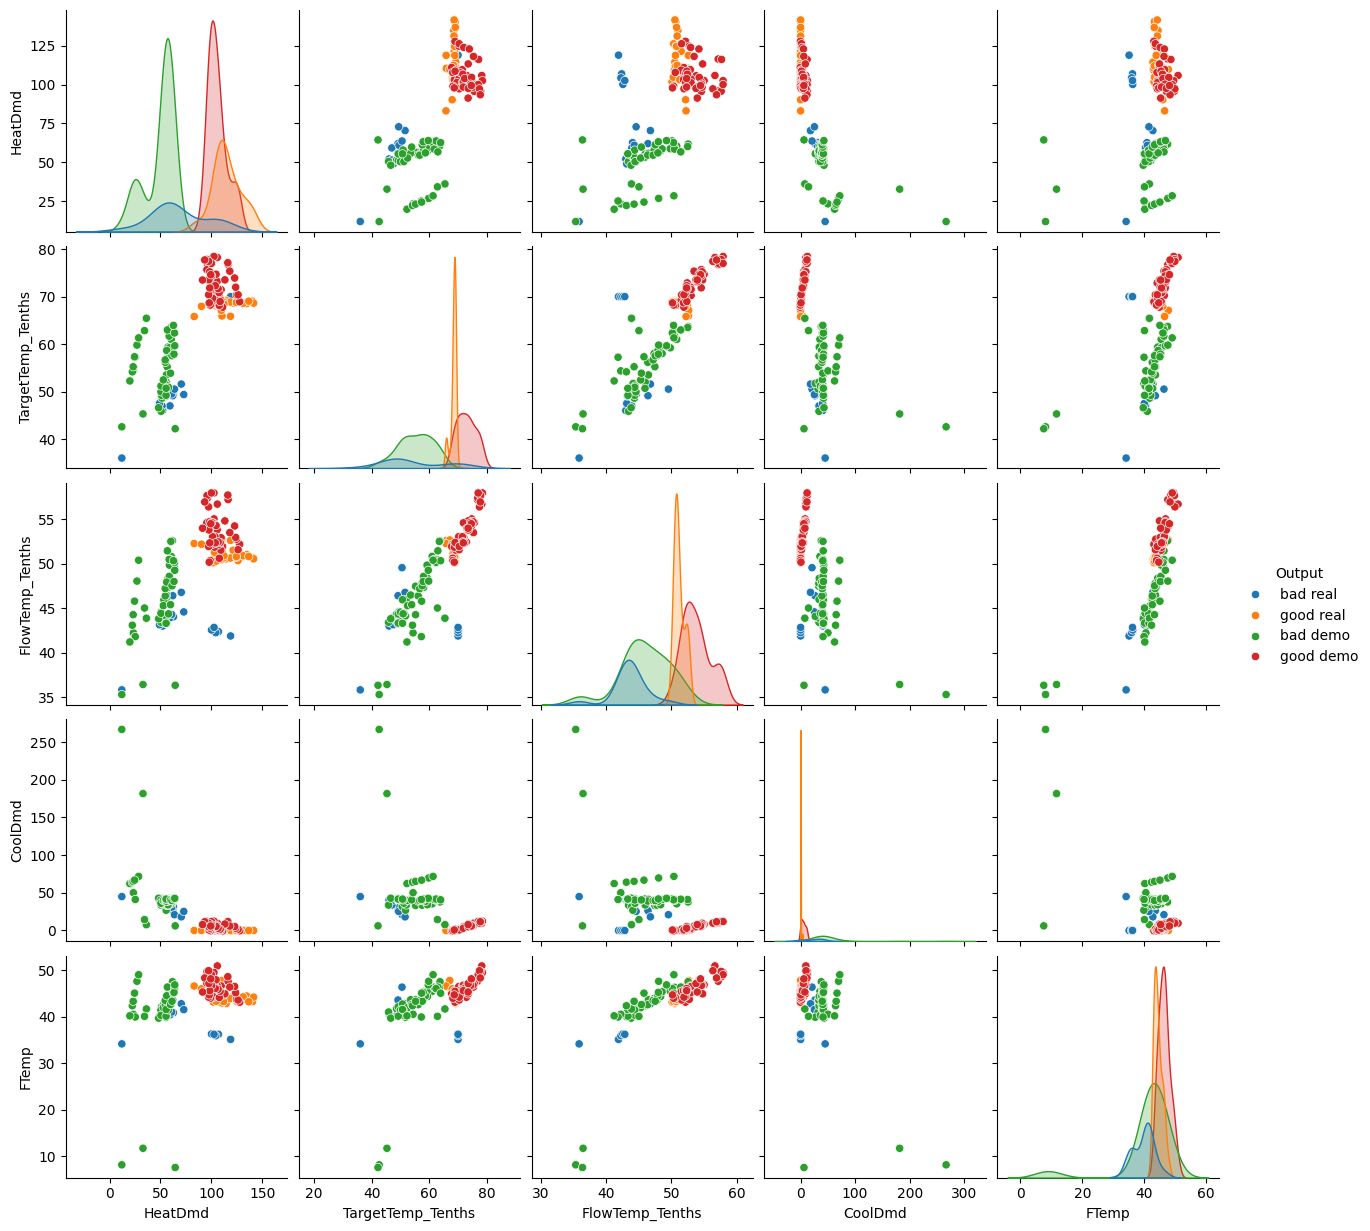

In [89]:
sns.pairplot(df, hue='Output', palette='tab10')

***Correlation metrix***

In [ ]:
matrix = df.corr()
matrix.to_csv('correlation_matrix.csv', index=True)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(ax=ax, data=matrix, annot=True)

***Feature importance***

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'target' is your label column
X = df.drop('Output', axis=1)
y = df['Output']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or export the feature importance to a CSV file
feature_importance_df.to_csv('feature_importance.csv', index=False)

# Display the feature importance DataFrame
# print(feature_importance_df)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


***elbow method***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cumulative importance plot
sorted_importances = np.sort(importances)[::-1]
cumulative_importance = np.cumsum(sorted_importances)

plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_importance)), cumulative_importance, marker='o', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid()
plt.show()


***Line plot***

In [ ]:
# Good Data

fig, axs = plt.subplots(6,5, figsize=(30,25))

# 1
ax1_1 = axs[0,0]
ax1_1.set_xlabel('time')
ax1_1.set_ylabel('PWM')
ax1_1.plot(g1['HeatDmd'].index, g1['HeatDmd'], '-', color='blue', label='HeatDmd')
ax1_1.plot(g1['CoolDmd'].index, g1['CoolDmd'], '-', color='orange', label='CoolDmd')
ax1_1.legend()
ax1_2 = ax1_1.twinx()
ax1_2.set_ylabel('temp')
ax1_2.plot(g1['TargetTemp_Tenths'].index, g1['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax1_2.plot(g1['FlowTemp_Tenths'].index, g1['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax1_2.plot(g1['FTemp'].index, g1['FTemp'], '-', color='red', label='FTemp')
ax1_2.legend()

# 2
ax2_1 = axs[0,1]
ax2_1.set_xlabel('time')
ax2_1.set_ylabel('PWM')
ax2_1.plot(g2['HeatDmd'].index, g2['HeatDmd'], '-', color='blue', label='HeatDmd')
ax2_1.plot(g2['CoolDmd'].index, g2['CoolDmd'], '-', color='orange', label='CoolDmd')
ax2_1.legend()
ax2_2 = ax2_1.twinx()
ax2_2.set_ylabel('temp')
ax2_2.plot(g2['TargetTemp_Tenths'].index, g2['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax2_2.plot(g2['FlowTemp_Tenths'].index, g2['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax2_2.plot(g2['FTemp'].index, g2['FTemp'], '-', color='red', label='FTemp')
ax2_2.legend()

# 3
ax3_1 = axs[0,2]
ax3_1.set_xlabel('time')
ax3_1.set_ylabel('PWM')
ax3_1.plot(g3['HeatDmd'].index, g3['HeatDmd'], '-', color='blue', label='HeatDmd')
ax3_1.plot(g3['CoolDmd'].index, g3['CoolDmd'], '-', color='orange', label='CoolDmd')
ax3_1.legend()
ax3_2 = ax3_1.twinx()
ax3_2.set_ylabel('temp')
ax3_2.plot(g3['TargetTemp_Tenths'].index, g3['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax3_2.plot(g3['FlowTemp_Tenths'].index, g3['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax3_2.plot(g3['FTemp'].index, g3['FTemp'], '-', color='red', label='FTemp')
ax3_2.legend()

# 4
ax4_1 = axs[0,3]
ax4_1.set_xlabel('time')
ax4_1.set_ylabel('PWM')
ax4_1.plot(g4['HeatDmd'].index, g4['HeatDmd'], '-', color='blue', label='HeatDmd')
ax4_1.plot(g4['CoolDmd'].index, g4['CoolDmd'], '-', color='orange', label='CoolDmd')
ax4_1.legend()
ax4_2 = ax4_1.twinx()
ax4_2.set_ylabel('temp')
ax4_2.plot(g4['TargetTemp_Tenths'].index, g4['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax4_2.plot(g4['FlowTemp_Tenths'].index, g4['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax4_2.plot(g4['FTemp'].index, g4['FTemp'], '-', color='red', label='FTemp')
ax4_2.legend()

# 5
ax5_1 = axs[0,4]
ax5_1.set_xlabel('time')
ax5_1.set_ylabel('PWM')
ax5_1.plot(g5['HeatDmd'].index, g5['HeatDmd'], '-', color='blue', label='HeatDmd')
ax5_1.plot(g5['CoolDmd'].index, g5['CoolDmd'], '-', color='orange', label='CoolDmd')
ax5_1.legend()
ax5_2 = ax5_1.twinx()
ax5_2.set_ylabel('temp')
ax5_2.plot(g5['TargetTemp_Tenths'].index, g5['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax5_2.plot(g5['FlowTemp_Tenths'].index, g5['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax5_2.plot(g5['FTemp'].index, g5['FTemp'], '-', color='red', label='FTemp')
ax5_2.legend()

# 6
ax6_1 = axs[1,0]
ax6_1.set_xlabel('time')
ax6_1.set_ylabel('PWM')
ax6_1.plot(g6['HeatDmd'].index, g6['HeatDmd'], '-', color='blue', label='HeatDmd')
ax6_1.plot(g6['CoolDmd'].index, g6['CoolDmd'], '-', color='orange', label='CoolDmd')
ax6_1.legend()
ax6_2 = ax6_1.twinx()
ax6_2.set_ylabel('temp')
ax6_2.plot(g6['TargetTemp_Tenths'].index, g6['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax6_2.plot(g6['FlowTemp_Tenths'].index, g6['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax6_2.plot(g6['FTemp'].index, g6['FTemp'], '-', color='red', label='FTemp')
ax6_2.legend()

# 7
ax7_1 = axs[1,1]
ax7_1.set_xlabel('time')
ax7_1.set_ylabel('PWM')
ax7_1.plot(g7['HeatDmd'].index, g7['HeatDmd'], '-', color='blue', label='HeatDmd')
ax7_1.plot(g7['CoolDmd'].index, g7['CoolDmd'], '-', color='orange', label='CoolDmd')
ax7_1.legend()
ax7_2 = ax7_1.twinx()
ax7_2.set_ylabel('temp')
ax7_2.plot(g7['TargetTemp_Tenths'].index, g7['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax7_2.plot(g7['FlowTemp_Tenths'].index, g7['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax7_2.plot(g7['FTemp'].index, g7['FTemp'], '-', color='red', label='FTemp')
ax7_2.legend()

# 8
ax8_1 = axs[1,2]
ax8_1.set_xlabel('time')
ax8_1.set_ylabel('PWM')
ax8_1.plot(g8['HeatDmd'].index, g8['HeatDmd'], '-', color='blue', label='HeatDmd')
ax8_1.plot(g8['CoolDmd'].index, g8['CoolDmd'], '-', color='orange', label='CoolDmd')
ax8_1.legend()
ax8_2 = ax8_1.twinx()
ax8_2.set_ylabel('temp')
ax8_2.plot(g8['TargetTemp_Tenths'].index, g8['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax8_2.plot(g8['FlowTemp_Tenths'].index, g8['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax8_2.plot(g8['FTemp'].index, g8['FTemp'], '-', color='red', label='FTemp')
ax8_2.legend()

# 9
ax9_1 = axs[1,3]
ax9_1.set_xlabel('time')
ax9_1.set_ylabel('PWM')
ax9_1.plot(g9['HeatDmd'].index, g9['HeatDmd'], '-', color='blue', label='HeatDmd')
ax9_1.plot(g9['CoolDmd'].index, g9['CoolDmd'], '-', color='orange', label='CoolDmd')
ax9_1.legend()
ax9_2 = ax9_1.twinx()
ax9_2.set_ylabel('temp')
ax9_2.plot(g9['TargetTemp_Tenths'].index, g9['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax9_2.plot(g9['FlowTemp_Tenths'].index, g9['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax9_2.plot(g9['FTemp'].index, g9['FTemp'], '-', color='red', label='FTemp')
ax9_2.legend()

# 10
ax10_1 = axs[1,4]
ax10_1.set_xlabel('time')
ax10_1.set_ylabel('PWM')
ax10_1.plot(g10['HeatDmd'].index, g10['HeatDmd'], '-', color='blue', label='HeatDmd')
ax10_1.plot(g10['CoolDmd'].index, g10['CoolDmd'], '-', color='orange', label='CoolDmd')
ax10_1.legend()
ax10_2 = ax10_1.twinx()
ax10_2.set_ylabel('temp')
ax10_2.plot(g10['TargetTemp_Tenths'].index, g10['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax10_2.plot(g10['FlowTemp_Tenths'].index, g10['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax10_2.plot(g10['FTemp'].index, g10['FTemp'], '-', color='red', label='FTemp')
ax10_2.legend()

# 11
ax11_1 = axs[2,0]
ax11_1.set_xlabel('time')
ax11_1.set_ylabel('PWM')
ax11_1.plot(g11['HeatDmd'].index, g11['HeatDmd'], '-', color='blue', label='HeatDmd')
ax11_1.plot(g11['CoolDmd'].index, g11['CoolDmd'], '-', color='orange', label='CoolDmd')
ax11_1.legend()
ax11_2 = ax11_1.twinx()
ax11_2.set_ylabel('temp')
ax11_2.plot(g11['TargetTemp_Tenths'].index, g11['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax11_2.plot(g11['FlowTemp_Tenths'].index, g11['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax11_2.plot(g11['FTemp'].index, g11['FTemp'], '-', color='red', label='FTemp')
ax11_2.legend()

# 12
ax12_1 = axs[2,1]
ax12_1.set_xlabel('time')
ax12_1.set_ylabel('PWM')
ax12_1.plot(g12['HeatDmd'].index, g12['HeatDmd'], '-', color='blue', label='HeatDmd')
ax12_1.plot(g12['CoolDmd'].index, g12['CoolDmd'], '-', color='orange', label='CoolDmd')
ax12_1.legend()
ax12_2 = ax12_1.twinx()
ax12_2.set_ylabel('temp')
ax12_2.plot(g12['TargetTemp_Tenths'].index, g12['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax12_2.plot(g12['FlowTemp_Tenths'].index, g12['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax12_2.plot(g12['FTemp'].index, g12['FTemp'], '-', color='red', label='FTemp')
ax12_2.legend()

# 13
ax13_1 = axs[2,2]
ax13_1.set_xlabel('time')
ax13_1.set_ylabel('PWM')
ax13_1.plot(g13['HeatDmd'].index, g13['HeatDmd'], '-', color='blue', label='HeatDmd')
ax13_1.plot(g13['CoolDmd'].index, g13['CoolDmd'], '-', color='orange', label='CoolDmd')
ax13_1.legend()
ax13_2 = ax13_1.twinx()
ax13_2.set_ylabel('temp')
ax13_2.plot(g13['TargetTemp_Tenths'].index, g13['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax13_2.plot(g13['FlowTemp_Tenths'].index, g13['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax13_2.plot(g13['FTemp'].index, g13['FTemp'], '-', color='red', label='FTemp')
ax13_2.legend()

# 14
ax14_1 = axs[2,3]
ax14_1.set_xlabel('time')
ax14_1.set_ylabel('PWM')
ax14_1.plot(g14['HeatDmd'].index, g14['HeatDmd'], '-', color='blue', label='HeatDmd')
ax14_1.plot(g14['CoolDmd'].index, g14['CoolDmd'], '-', color='orange', label='CoolDmd')
ax14_1.legend()
ax14_2 = ax14_1.twinx()
ax14_2.set_ylabel('temp')
ax14_2.plot(g14['TargetTemp_Tenths'].index, g14['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax14_2.plot(g14['FlowTemp_Tenths'].index, g14['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax14_2.plot(g14['FTemp'].index, g14['FTemp'], '-', color='red', label='FTemp')
ax14_2.legend()

# 15
ax15_1 = axs[2,4]
ax15_1.set_xlabel('time')
ax15_1.set_ylabel('PWM')
ax15_1.plot(g15['HeatDmd'].index, g15['HeatDmd'], '-', color='blue', label='HeatDmd')
ax15_1.plot(g15['CoolDmd'].index, g15['CoolDmd'], '-', color='orange', label='CoolDmd')
ax15_1.legend()
ax15_2 = ax15_1.twinx()
ax15_2.set_ylabel('temp')
ax15_2.plot(g15['TargetTemp_Tenths'].index, g15['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax15_2.plot(g15['FlowTemp_Tenths'].index, g15['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax15_2.plot(g15['FTemp'].index, g15['FTemp'], '-', color='red', label='FTemp')
ax15_2.legend()

# 16
ax16_1 = axs[3,0]
ax16_1.set_xlabel('time')
ax16_1.set_ylabel('PWM')
ax16_1.plot(g16['HeatDmd'].index, g16['HeatDmd'], '-', color='blue', label='HeatDmd')
ax16_1.plot(g16['CoolDmd'].index, g16['CoolDmd'], '-', color='orange', label='CoolDmd')
ax16_1.legend()
ax16_2 = ax16_1.twinx()
ax16_2.set_ylabel('temp')
ax16_2.plot(g16['TargetTemp_Tenths'].index, g16['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax16_2.plot(g16['FlowTemp_Tenths'].index, g16['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax16_2.plot(g16['FTemp'].index, g16['FTemp'], '-', color='red', label='FTemp')
ax16_2.legend()

# 17
ax17_1 = axs[3,1]
ax17_1.set_xlabel('time')
ax17_1.set_ylabel('PWM')
ax17_1.plot(g17['HeatDmd'].index, g17['HeatDmd'], '-', color='blue', label='HeatDmd')
ax17_1.plot(g17['CoolDmd'].index, g17['CoolDmd'], '-', color='orange', label='CoolDmd')
ax17_1.legend()
ax17_2 = ax17_1.twinx()
ax17_2.set_ylabel('temp')
ax17_2.plot(g17['TargetTemp_Tenths'].index, g17['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax17_2.plot(g17['FlowTemp_Tenths'].index, g17['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax17_2.plot(g17['FTemp'].index, g17['FTemp'], '-', color='red', label='FTemp')
ax17_2.legend()

# 18
ax18_1 = axs[3,2]
ax18_1.set_xlabel('time')
ax18_1.set_ylabel('PWM')
ax18_1.plot(g18['HeatDmd'].index, g18['HeatDmd'], '-', color='blue', label='HeatDmd')
ax18_1.plot(g18['CoolDmd'].index, g18['CoolDmd'], '-', color='orange', label='CoolDmd')
ax18_1.legend()
ax18_2 = ax18_1.twinx()
ax18_2.set_ylabel('temp')
ax18_2.plot(g18['TargetTemp_Tenths'].index, g18['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax18_2.plot(g18['FlowTemp_Tenths'].index, g18['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax18_2.plot(g18['FTemp'].index, g18['FTemp'], '-', color='red', label='FTemp')
ax18_2.legend()

# 19
ax19_1 = axs[3,3]
ax19_1.set_xlabel('time')
ax19_1.set_ylabel('PWM')
ax19_1.plot(g19['HeatDmd'].index, g19['HeatDmd'], '-', color='blue', label='HeatDmd')
ax19_1.plot(g19['CoolDmd'].index, g19['CoolDmd'], '-', color='orange', label='CoolDmd')
ax19_1.legend()
ax19_2 = ax19_1.twinx()
ax19_2.set_ylabel('temp')
ax19_2.plot(g19['TargetTemp_Tenths'].index, g19['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax19_2.plot(g19['FlowTemp_Tenths'].index, g19['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax19_2.plot(g19['FTemp'].index, g19['FTemp'], '-', color='red', label='FTemp')
ax19_2.legend()

# 20
ax20_1 = axs[3,4]
ax20_1.set_xlabel('time')
ax20_1.set_ylabel('PWM')
ax20_1.plot(g20['HeatDmd'].index, g20['HeatDmd'], '-', color='blue', label='HeatDmd')
ax20_1.plot(g20['CoolDmd'].index, g20['CoolDmd'], '-', color='orange', label='CoolDmd')
ax20_1.legend()
ax20_2 = ax20_1.twinx()
ax20_2.set_ylabel('temp')
ax20_2.plot(g20['TargetTemp_Tenths'].index, g20['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax20_2.plot(g20['FlowTemp_Tenths'].index, g20['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax20_2.plot(g20['FTemp'].index, g20['FTemp'], '-', color='red', label='FTemp')
ax20_2.legend()

# 21
ax21_1 = axs[4,0]
ax21_1.set_xlabel('time')
ax21_1.set_ylabel('PWM')
ax21_1.plot(g21['HeatDmd'].index, g21['HeatDmd'], '-', color='blue', label='HeatDmd')
ax21_1.plot(g21['CoolDmd'].index, g21['CoolDmd'], '-', color='orange', label='CoolDmd')
ax21_1.legend()
ax21_2 = ax21_1.twinx()
ax21_2.set_ylabel('temp')
ax21_2.plot(g21['TargetTemp_Tenths'].index, g21['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax21_2.plot(g21['FlowTemp_Tenths'].index, g21['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax21_2.plot(g21['FTemp'].index, g21['FTemp'], '-', color='red', label='FTemp')
ax21_2.legend()

# 22
ax22_1 = axs[4,1]
ax22_1.set_xlabel('time')
ax22_1.set_ylabel('PWM')
ax22_1.plot(g22['HeatDmd'].index, g22['HeatDmd'], '-', color='blue', label='HeatDmd')
ax22_1.plot(g22['CoolDmd'].index, g22['CoolDmd'], '-', color='orange', label='CoolDmd')
ax22_1.legend()
ax22_2 = ax22_1.twinx()
ax22_2.set_ylabel('temp')
ax22_2.plot(g22['TargetTemp_Tenths'].index, g22['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax22_2.plot(g22['FlowTemp_Tenths'].index, g22['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax22_2.plot(g22['FTemp'].index, g22['FTemp'], '-', color='red', label='FTemp')
ax22_2.legend()

# 23
ax23_1 = axs[4,2]
ax23_1.set_xlabel('time')
ax23_1.set_ylabel('PWM')
ax23_1.plot(g23['HeatDmd'].index, g23['HeatDmd'], '-', color='blue', label='HeatDmd')
ax23_1.plot(g23['CoolDmd'].index, g23['CoolDmd'], '-', color='orange', label='CoolDmd')
ax23_1.legend()
ax23_2 = ax23_1.twinx()
ax23_2.set_ylabel('temp')
ax23_2.plot(g23['TargetTemp_Tenths'].index, g23['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax23_2.plot(g23['FlowTemp_Tenths'].index, g23['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax23_2.plot(g23['FTemp'].index, g23['FTemp'], '-', color='red', label='FTemp')
ax23_2.legend()

# 24
ax24_1 = axs[4,3]
ax24_1.set_xlabel('time')
ax24_1.set_ylabel('PWM')
ax24_1.plot(g24['HeatDmd'].index, g24['HeatDmd'], '-', color='blue', label='HeatDmd')
ax24_1.plot(g24['CoolDmd'].index, g24['CoolDmd'], '-', color='orange', label='CoolDmd')
ax24_1.legend()
ax24_2 = ax24_1.twinx()
ax24_2.set_ylabel('temp')
ax24_2.plot(g24['TargetTemp_Tenths'].index, g24['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax24_2.plot(g24['FlowTemp_Tenths'].index, g24['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax24_2.plot(g24['FTemp'].index, g24['FTemp'], '-', color='red', label='FTemp')
ax24_2.legend()

# 25
ax25_1 = axs[4,4]
ax25_1.set_xlabel('time')
ax25_1.set_ylabel('PWM')
ax25_1.plot(g25['HeatDmd'].index, g25['HeatDmd'], '-', color='blue', label='HeatDmd')
ax25_1.plot(g25['CoolDmd'].index, g25['CoolDmd'], '-', color='orange', label='CoolDmd')
ax25_1.legend()
ax25_2 = ax25_1.twinx()
ax25_2.set_ylabel('temp')
ax25_2.plot(g25['TargetTemp_Tenths'].index, g25['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax25_2.plot(g25['FlowTemp_Tenths'].index, g25['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax25_2.plot(g25['FTemp'].index, g25['FTemp'], '-', color='red', label='FTemp')
ax25_2.legend()

# 26
ax26_1 = axs[5,0]
ax26_1.set_xlabel('time')
ax26_1.set_ylabel('PWM')
ax26_1.plot(g26['HeatDmd'].index, g26['HeatDmd'], '-', color='blue', label='HeatDmd')
ax26_1.plot(g26['CoolDmd'].index, g26['CoolDmd'], '-', color='orange', label='CoolDmd')
ax26_1.legend()
ax26_2 = ax26_1.twinx()
ax26_2.set_ylabel('temp')
ax26_2.plot(g26['TargetTemp_Tenths'].index, g26['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax26_2.plot(g26['FlowTemp_Tenths'].index, g26['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax26_2.plot(g26['FTemp'].index, g26['FTemp'], '-', color='red', label='FTemp')
ax26_2.legend()

# 27
ax27_1 = axs[5,1]
ax27_1.set_xlabel('time')
ax27_1.set_ylabel('PWM')
ax27_1.plot(g27['HeatDmd'].index, g27['HeatDmd'], '-', color='blue', label='HeatDmd')
ax27_1.plot(g27['CoolDmd'].index, g27['CoolDmd'], '-', color='orange', label='CoolDmd')
ax27_1.legend()
ax27_2 = ax27_1.twinx()
ax27_2.set_ylabel('temp')
ax27_2.plot(g27['TargetTemp_Tenths'].index, g27['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax27_2.plot(g27['FlowTemp_Tenths'].index, g27['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax27_2.plot(g27['FTemp'].index, g27['FTemp'], '-', color='red', label='FTemp')
ax27_2.legend()

# 28
ax28_1 = axs[5,2]
ax28_1.set_xlabel('time')
ax28_1.set_ylabel('PWM')
ax28_1.plot(g28['HeatDmd'].index, g28['HeatDmd'], '-', color='blue', label='HeatDmd')
ax28_1.plot(g28['CoolDmd'].index, g28['CoolDmd'], '-', color='orange', label='CoolDmd')
ax28_1.legend()
ax28_2 = ax28_1.twinx()
ax28_2.set_ylabel('temp')
ax28_2.plot(g28['TargetTemp_Tenths'].index, g28['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax28_2.plot(g28['FlowTemp_Tenths'].index, g28['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax28_2.plot(g28['FTemp'].index, g28['FTemp'], '-', color='red', label='FTemp')
ax28_2.legend()

# 29
ax29_1 = axs[5,3]
ax29_1.set_xlabel('time')
ax29_1.set_ylabel('PWM')
ax29_1.plot(g29['HeatDmd'].index, g29['HeatDmd'], '-', color='blue', label='HeatDmd')
ax29_1.plot(g29['CoolDmd'].index, g29['CoolDmd'], '-', color='orange', label='CoolDmd')
ax29_1.legend()
ax29_2 = ax29_1.twinx()
ax29_2.set_ylabel('temp')
ax29_2.plot(g29['TargetTemp_Tenths'].index, g29['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax29_2.plot(g29['FlowTemp_Tenths'].index, g29['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax29_2.plot(g29['FTemp'].index, g29['FTemp'], '-', color='red', label='FTemp')
ax29_2.legend()

# 30
ax30_1 = axs[5,4]
ax30_1.set_xlabel('time')
ax30_1.set_ylabel('PWM')
ax30_1.plot(g30['HeatDmd'].index, g30['HeatDmd'], '-', color='blue', label='HeatDmd')
ax30_1.plot(g30['CoolDmd'].index, g30['CoolDmd'], '-', color='orange', label='CoolDmd')
ax30_1.legend()
ax30_2 = ax30_1.twinx()
ax30_2.set_ylabel('temp')
ax30_2.plot(g30['TargetTemp_Tenths'].index, g30['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax30_2.plot(g30['FlowTemp_Tenths'].index, g30['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax30_2.plot(g30['FTemp'].index, g30['FTemp'], '-', color='red', label='FTemp')
ax30_2.legend()

plt.show()

In [ ]:
# Bad Data

fib, axs = plt.subplots(4,5, figsize=(30,25))

# 1
ax1_1 = axs[0,0]
ax1_1.set_xlabel('time')
ax1_1.set_ylabel('PWM')
ax1_1.plot(b1['HeatDmd'].index, b1['HeatDmd'], '-', color='blue', label='HeatDmd')
ax1_1.plot(b1['CoolDmd'].index, b1['CoolDmd'], '-', color='orange', label='CoolDmd')
ax1_1.legend()
ax1_2 = ax1_1.twinx()
ax1_2.set_ylabel('temp')
ax1_2.plot(b1['TargetTemp_Tenths'].index, b1['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax1_2.plot(b1['FlowTemp_Tenths'].index, b1['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax1_2.plot(b1['FTemp'].index, b1['FTemp'], '-', color='red', label='FTemp')
ax1_2.legend()

# 2
ax2_1 = axs[0,1]
ax2_1.set_xlabel('time')
ax2_1.set_ylabel('PWM')
ax2_1.plot(b2['HeatDmd'].index, b2['HeatDmd'], '-', color='blue', label='HeatDmd')
ax2_1.plot(b2['CoolDmd'].index, b2['CoolDmd'], '-', color='orange', label='CoolDmd')
ax2_1.legend()
ax2_2 = ax2_1.twinx()
ax2_2.set_ylabel('temp')
ax2_2.plot(b2['TargetTemp_Tenths'].index, b2['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax2_2.plot(b2['FlowTemp_Tenths'].index, b2['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax2_2.plot(b2['FTemp'].index, b2['FTemp'], '-', color='red', label='FTemp')
ax2_2.legend()

# 3
ax3_1 = axs[0,2]
ax3_1.set_xlabel('time')
ax3_1.set_ylabel('PWM')
ax3_1.plot(b3['HeatDmd'].index, b3['HeatDmd'], '-', color='blue', label='HeatDmd')
ax3_1.plot(b3['CoolDmd'].index, b3['CoolDmd'], '-', color='orange', label='CoolDmd')
ax3_1.legend()
ax3_2 = ax3_1.twinx()
ax3_2.set_ylabel('temp')
ax3_2.plot(b3['TargetTemp_Tenths'].index, b3['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax3_2.plot(b3['FlowTemp_Tenths'].index, b3['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax3_2.plot(b3['FTemp'].index, b3['FTemp'], '-', color='red', label='FTemp')
ax3_2.legend()

# 4
ax4_1 = axs[0,3]
ax4_1.set_xlabel('time')
ax4_1.set_ylabel('PWM')
ax4_1.plot(b4['HeatDmd'].index, b4['HeatDmd'], '-', color='blue', label='HeatDmd')
ax4_1.plot(b4['CoolDmd'].index, b4['CoolDmd'], '-', color='orange', label='CoolDmd')
ax4_1.legend()
ax4_2 = ax4_1.twinx()
ax4_2.set_ylabel('temp')
ax4_2.plot(b4['TargetTemp_Tenths'].index, b4['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax4_2.plot(b4['FlowTemp_Tenths'].index, b4['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax4_2.plot(b4['FTemp'].index, b4['FTemp'], '-', color='red', label='FTemp')
ax4_2.legend()

# 5
ax5_1 = axs[0,4]
ax5_1.set_xlabel('time')
ax5_1.set_ylabel('PWM')
ax5_1.plot(b5['HeatDmd'].index, b5['HeatDmd'], '-', color='blue', label='HeatDmd')
ax5_1.plot(b5['CoolDmd'].index, b5['CoolDmd'], '-', color='orange', label='CoolDmd')
ax5_1.legend()
ax5_2 = ax5_1.twinx()
ax5_2.set_ylabel('temp')
ax5_2.plot(b5['TargetTemp_Tenths'].index, b5['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax5_2.plot(b5['FlowTemp_Tenths'].index, b5['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax5_2.plot(b5['FTemp'].index, b5['FTemp'], '-', color='red', label='FTemp')
ax5_2.legend()

# 6
ax6_1 = axs[1,0]
ax6_1.set_xlabel('time')
ax6_1.set_ylabel('PWM')
ax6_1.plot(b6['HeatDmd'].index, b6['HeatDmd'], '-', color='blue', label='HeatDmd')
ax6_1.plot(b6['CoolDmd'].index, b6['CoolDmd'], '-', color='orange', label='CoolDmd')
ax6_1.legend()
ax6_2 = ax6_1.twinx()
ax6_2.set_ylabel('temp')
ax6_2.plot(b6['TargetTemp_Tenths'].index, b6['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax6_2.plot(b6['FlowTemp_Tenths'].index, b6['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax6_2.plot(b6['FTemp'].index, b6['FTemp'], '-', color='red', label='FTemp')
ax6_2.legend()

# 7
ax7_1 = axs[1,1]
ax7_1.set_xlabel('time')
ax7_1.set_ylabel('PWM')
ax7_1.plot(b7['HeatDmd'].index, b7['HeatDmd'], '-', color='blue', label='HeatDmd')
ax7_1.plot(b7['CoolDmd'].index, b7['CoolDmd'], '-', color='orange', label='CoolDmd')
ax7_1.legend()
ax7_2 = ax7_1.twinx()
ax7_2.set_ylabel('temp')
ax7_2.plot(b7['TargetTemp_Tenths'].index, b7['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax7_2.plot(b7['FlowTemp_Tenths'].index, b7['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax7_2.plot(b7['FTemp'].index, b7['FTemp'], '-', color='red', label='FTemp')
ax7_2.legend()

# 8
ax8_1 = axs[1,2]
ax8_1.set_xlabel('time')
ax8_1.set_ylabel('PWM')
ax8_1.plot(b8['HeatDmd'].index, b8['HeatDmd'], '-', color='blue', label='HeatDmd')
ax8_1.plot(b8['CoolDmd'].index, b8['CoolDmd'], '-', color='orange', label='CoolDmd')
ax8_1.legend()
ax8_2 = ax8_1.twinx()
ax8_2.set_ylabel('temp')
ax8_2.plot(b8['TargetTemp_Tenths'].index, b8['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax8_2.plot(b8['FlowTemp_Tenths'].index, b8['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax8_2.plot(b8['FTemp'].index, b8['FTemp'], '-', color='red', label='FTemp')
ax8_2.legend()

# 9
ax9_1 = axs[1,3]
ax9_1.set_xlabel('time')
ax9_1.set_ylabel('PWM')
ax9_1.plot(b9['HeatDmd'].index, b9['HeatDmd'], '-', color='blue', label='HeatDmd')
ax9_1.plot(b9['CoolDmd'].index, b9['CoolDmd'], '-', color='orange', label='CoolDmd')
ax9_1.legend()
ax9_2 = ax9_1.twinx()
ax9_2.set_ylabel('temp')
ax9_2.plot(b9['TargetTemp_Tenths'].index, b9['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax9_2.plot(b9['FlowTemp_Tenths'].index, b9['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax9_2.plot(b9['FTemp'].index, b9['FTemp'], '-', color='red', label='FTemp')
ax9_2.legend()

# 10
ax10_1 = axs[1,4]
ax10_1.set_xlabel('time')
ax10_1.set_ylabel('PWM')
ax10_1.plot(b10['HeatDmd'].index, b10['HeatDmd'], '-', color='blue', label='HeatDmd')
ax10_1.plot(b10['CoolDmd'].index, b10['CoolDmd'], '-', color='orange', label='CoolDmd')
ax10_1.legend()
ax10_2 = ax10_1.twinx()
ax10_2.set_ylabel('temp')
ax10_2.plot(b10['TargetTemp_Tenths'].index, b10['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax10_2.plot(b10['FlowTemp_Tenths'].index, b10['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax10_2.plot(b10['FTemp'].index, b10['FTemp'], '-', color='red', label='FTemp')
ax10_2.legend()

# 11
ax11_1 = axs[2,0]
ax11_1.set_xlabel('time')
ax11_1.set_ylabel('PWM')
ax11_1.plot(b11['HeatDmd'].index, b11['HeatDmd'], '-', color='blue', label='HeatDmd')
ax11_1.plot(b11['CoolDmd'].index, b11['CoolDmd'], '-', color='orange', label='CoolDmd')
ax11_1.legend()
ax11_2 = ax11_1.twinx()
ax11_2.set_ylabel('temp')
ax11_2.plot(b11['TargetTemp_Tenths'].index, b11['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax11_2.plot(b11['FlowTemp_Tenths'].index, b11['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax11_2.plot(b11['FTemp'].index, b11['FTemp'], '-', color='red', label='FTemp')
ax11_2.legend()

# 12
ax12_1 = axs[2,1]
ax12_1.set_xlabel('time')
ax12_1.set_ylabel('PWM')
ax12_1.plot(b12['HeatDmd'].index, b12['HeatDmd'], '-', color='blue', label='HeatDmd')
ax12_1.plot(b12['CoolDmd'].index, b12['CoolDmd'], '-', color='orange', label='CoolDmd')
ax12_1.legend()
ax12_2 = ax12_1.twinx()
ax12_2.set_ylabel('temp')
ax12_2.plot(b12['TargetTemp_Tenths'].index, b12['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax12_2.plot(b12['FlowTemp_Tenths'].index, b12['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax12_2.plot(b12['FTemp'].index, b12['FTemp'], '-', color='red', label='FTemp')
ax12_2.legend()

# 13
ax13_1 = axs[2,2]
ax13_1.set_xlabel('time')
ax13_1.set_ylabel('PWM')
ax13_1.plot(b13['HeatDmd'].index, b13['HeatDmd'], '-', color='blue', label='HeatDmd')
ax13_1.plot(b13['CoolDmd'].index, b13['CoolDmd'], '-', color='orange', label='CoolDmd')
ax13_1.legend()
ax13_2 = ax13_1.twinx()
ax13_2.set_ylabel('temp')
ax13_2.plot(b13['TargetTemp_Tenths'].index, b13['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax13_2.plot(b13['FlowTemp_Tenths'].index, b13['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax13_2.plot(b13['FTemp'].index, b13['FTemp'], '-', color='red', label='FTemp')
ax13_2.legend()

# 14
ax14_1 = axs[2,3]
ax14_1.set_xlabel('time')
ax14_1.set_ylabel('PWM')
ax14_1.plot(b14['HeatDmd'].index, b14['HeatDmd'], '-', color='blue', label='HeatDmd')
ax14_1.plot(b14['CoolDmd'].index, b14['CoolDmd'], '-', color='orange', label='CoolDmd')
ax14_1.legend()
ax14_2 = ax14_1.twinx()
ax14_2.set_ylabel('temp')
ax14_2.plot(b14['TargetTemp_Tenths'].index, b14['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax14_2.plot(b14['FlowTemp_Tenths'].index, b14['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax14_2.plot(b14['FTemp'].index, b14['FTemp'], '-', color='red', label='FTemp')
ax14_2.legend()

# 15
ax15_1 = axs[2,4]
ax15_1.set_xlabel('time')
ax15_1.set_ylabel('PWM')
ax15_1.plot(b15['HeatDmd'].index, b15['HeatDmd'], '-', color='blue', label='HeatDmd')
ax15_1.plot(b15['CoolDmd'].index, b15['CoolDmd'], '-', color='orange', label='CoolDmd')
ax15_1.legend()
ax15_2 = ax15_1.twinx()
ax15_2.set_ylabel('temp')
ax15_2.plot(b15['TargetTemp_Tenths'].index, b15['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax15_2.plot(b15['FlowTemp_Tenths'].index, b15['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax15_2.plot(b15['FTemp'].index, b15['FTemp'], '-', color='red', label='FTemp')
ax15_2.legend()

# 16
ax16_1 = axs[3,0]
ax16_1.set_xlabel('time')
ax16_1.set_ylabel('PWM')
ax16_1.plot(b16['HeatDmd'].index, b16['HeatDmd'], '-', color='blue', label='HeatDmd')
ax16_1.plot(b16['CoolDmd'].index, b16['CoolDmd'], '-', color='orange', label='CoolDmd')
ax16_1.legend()
ax16_2 = ax16_1.twinx()
ax16_2.set_ylabel('temp')
ax16_2.plot(b16['TargetTemp_Tenths'].index, b16['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax16_2.plot(b16['FlowTemp_Tenths'].index, b16['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax16_2.plot(b16['FTemp'].index, b16['FTemp'], '-', color='red', label='FTemp')
ax16_2.legend()

# 17
ax17_1 = axs[3,1]
ax17_1.set_xlabel('time')
ax17_1.set_ylabel('PWM')
ax17_1.plot(b17['HeatDmd'].index, b17['HeatDmd'], '-', color='blue', label='HeatDmd')
ax17_1.plot(b17['CoolDmd'].index, b17['CoolDmd'], '-', color='orange', label='CoolDmd')
ax17_1.legend()
ax17_2 = ax17_1.twinx()
ax17_2.set_ylabel('temp')
ax17_2.plot(b17['TargetTemp_Tenths'].index, b17['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax17_2.plot(b17['FlowTemp_Tenths'].index, b17['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax17_2.plot(b17['FTemp'].index, b17['FTemp'], '-', color='red', label='FTemp')
ax17_2.legend()

# 18
ax18_1 = axs[3,2]
ax18_1.set_xlabel('time')
ax18_1.set_ylabel('PWM')
ax18_1.plot(b18['HeatDmd'].index, b18['HeatDmd'], '-', color='blue', label='HeatDmd')
ax18_1.plot(b18['CoolDmd'].index, b18['CoolDmd'], '-', color='orange', label='CoolDmd')
ax18_1.legend()
ax18_2 = ax18_1.twinx()
ax18_2.set_ylabel('temp')
ax18_2.plot(b18['TargetTemp_Tenths'].index, b18['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax18_2.plot(b18['FlowTemp_Tenths'].index, b18['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax18_2.plot(b18['FTemp'].index, b18['FTemp'], '-', color='red', label='FTemp')
ax18_2.legend()

# 19
ax19_1 = axs[3,3]
ax19_1.set_xlabel('time')
ax19_1.set_ylabel('PWM')
ax19_1.plot(b19['HeatDmd'].index, b19['HeatDmd'], '-', color='blue', label='HeatDmd')
ax19_1.plot(b19['CoolDmd'].index, b19['CoolDmd'], '-', color='orange', label='CoolDmd')
ax19_1.legend()
ax19_2 = ax19_1.twinx()
ax19_2.set_ylabel('temp')
ax19_2.plot(b19['TargetTemp_Tenths'].index, b19['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax19_2.plot(b19['FlowTemp_Tenths'].index, b19['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax19_2.plot(b19['FTemp'].index, b19['FTemp'], '-', color='red', label='FTemp')
ax19_2.legend()

# 20
ax20_1 = axs[3,4]
ax20_1.set_xlabel('time')
ax20_1.set_ylabel('PWM')
ax20_1.plot(b20['HeatDmd'].index, b20['HeatDmd'], '-', color='blue', label='HeatDmd')
ax20_1.plot(b20['CoolDmd'].index, b20['CoolDmd'], '-', color='orange', label='CoolDmd')
ax20_1.legend()
ax20_2 = ax20_1.twinx()
ax20_2.set_ylabel('temp')
ax20_2.plot(b20['TargetTemp_Tenths'].index, b20['TargetTemp_Tenths'], '-', color='gray', label='TargetTemp_Tenths')
ax20_2.plot(b20['FlowTemp_Tenths'].index, b20['FlowTemp_Tenths'], '-', color='green', label='FlowTemp_Tenths')
ax20_2.plot(b20['FTemp'].index, b20['FTemp'], '-', color='red', label='FTemp')
ax20_2.legend()

plt.show()

***Plot distribution***

In [ ]:
df.head(50)

In [ ]:
# Compare clustering for 4 variables (feature importance)

fig, axs = plt.subplots(1,5, figsize=(25,5))
fig.suptitle('mean', fontsize=16)

sns.scatterplot(ax=axs[0], data=df, x='Output', y='HeatDmd', edgecolor='black', hue='Output')
axs[0].set_xlabel('sampling data')
axs[0].set_ylabel('HeatDmd')
axs[0].set_title('HeatDmd')

sns.scatterplot(ax=axs[1], data=df, x='Output', y='TargetTemp_Tenths', edgecolor='black', hue='Output')
axs[1].set_xlabel('sampling data')
axs[1].set_ylabel('TargetTemp_Tenths')
axs[1].set_title('TargetTemp_Tenths')

sns.scatterplot(ax=axs[2], data=df, x='Output', y='FlowTemp_Tenths', edgecolor='black', hue='Output')
axs[2].set_xlabel('sampling data')
axs[2].set_ylabel('FlowTemp_Tenths')
axs[2].set_title('FlowTemp_Tenths')

sns.scatterplot(ax=axs[3], data=df, x='Output', y='CoolDmd', edgecolor='black', hue='Output')
axs[3].set_xlabel('sampling data')
axs[3].set_ylabel('CoolDmd')
axs[3].set_title('CoolDmd')

sns.scatterplot(ax=axs[4], data=df, x='Output', y='FTemp', edgecolor='black', hue='Output')
axs[4].set_xlabel('sampling data')
axs[4].set_ylabel('FTemp')
axs[4].set_title('FTemp')

plt.subplots_adjust(wspace=0.3) 
plt.show()